In [43]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/cicisofia/Downloads/cf_as_function_of_x.dat')

# Step 1: Remove rows containing metadata (e.g., rows containing '#')
data_cleaned = data[~data['variables="x"'].str.contains('#', na=False)]

# Step 2: Inspect the first few rows after removing metadata
print(data_cleaned.head(10))

# Step 3:
# Use a regex to match rows that contain numeric data only in 'variables="x"'
numeric_rows = data_cleaned[data_cleaned['variables="x"'].str.match(r'^\s*\d+(\.\d+)?[Ee]?[+-]?\d*\s+', na=False)]

# Step 4: Check which rows are numeric
print(numeric_rows.head(10))

# Step 5: Split these numeric rows by whitespace
split_data = numeric_rows['variables="x"'].str.split(expand=True)

# Step 6: Check the split result
print(split_data.head(10))

# Step 7:

split_data.columns = ['x_value', 'skinfr_value', 'error_value']

# Step 8: Concatenate the split data with the cleaned data
data_cleaned = pd.concat([data_cleaned, split_data], axis=1)

# Step 9: Convert 'skinfr' and '5percenterror' to numeric, coercing errors to NaN
data_cleaned['skinfr'] = pd.to_numeric(data_cleaned['skinfr_value'], errors='coerce')
data_cleaned['5percenterror'] = pd.to_numeric(data_cleaned['error_value'], errors='coerce')

# Step 10: Drop rows with NaN in 'skinfr' or '5percenterror'
data_cleaned = data_cleaned.dropna(subset=['skinfr', '5percenterror'])

# Step 11: Drop the original 'variables="x"' column as it has been split
data_cleaned = data_cleaned.drop(columns=['variables="x"'])

# Step 12:
data_cleaned.to_csv('cleaned_cf_as_function_of_x.csv', index=False)

# Preview the cleaned data
print(data_cleaned.head())


                                        variables="x"        skinfr  \
2                                                zone   t="theory 1   
3           0.200000E-02        0.938257E-02      ...           NaN   
4           0.400000E-02        0.816800E-02      ...           NaN   
5           0.600000E-02        0.753178E-02      ...           NaN   
6           0.800000E-02        0.711066E-02      ...           NaN   
7           0.100000E-01        0.680029E-02      ...           NaN   
8           0.120000E-01        0.655679E-02      ...           NaN   
9           0.140000E-01        0.635773E-02      ...           NaN   
10          0.160000E-01        0.619019E-02      ...           NaN   
11          0.180000E-01        0.604607E-02      ...           NaN   

     5percenterror  
2    White 6-112a"  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN  
10             NaN  
11      

In [44]:
# Remove the '5percenterror' column (since 'variables="x"' isn't present)
data_cleaned = data_cleaned.drop(columns=['5percenterror'])

# Check the cleaned DataFrame
print(data_cleaned.head())


     skinfr       x_value  skinfr_value   error_value
3  0.009383  0.200000E-02  0.938257E-02  0.469128E-03
4  0.008168  0.400000E-02  0.816800E-02  0.408400E-03
5  0.007532  0.600000E-02  0.753178E-02  0.376589E-03
6  0.007111  0.800000E-02  0.711066E-02  0.355533E-03
7  0.006800  0.100000E-01  0.680029E-02  0.340015E-03


In [45]:
# Step 1: Problem Statement

# The problem involves analyzing turbulent boundary layers and how they grow, focusing on energy dissipation and intermittency.
# We are using high-fidelity Large Eddy Simulation (LES) data from NASA to model the behavior of the boundary layers.

# The goal is to better understand these phenomena and potentially improve the predictive capabilities of turbulence models.



In [46]:
# Step 2:

# Before diving into the data, review the relevant physical concepts:

# Turbulent Boundary Layer: This refers to the region of fluid flow near a surface where
# the velocity changes from zero (at the wall)nto the free-stream velocity (away from the wall). 
# It's where turbulence (chaotic fluid motion) dominates.

# Energy Dissipation: In turbulence, energy is transferred to smaller scales and ultimately dissipated as heat.
# This is important because it affects drag and heat transfer, which are crucial in engineering applications.

# Intermittency: This refers to the irregular and sometimes unpredictable fluctuations of turbulence.
# Understanding intermittency is key to improving turbulence models that may fail to predict these behaviors.

In [47]:
# Step 3: Analyze the Data

# The cleaned data includes variables like skinfr, x_value, skinfr_value, and error_value.


# 3.1 Key Variables to Focus On:

# x_value: The streamwise position along the flat plate.
# This will help demonstrate how the boundary layer grows along the plate.

# skinfr_value: The friction at the wall, which plays a significant role in turbulent boundary layer analysis.

# error_value: This could be related to the accuracy or uncertainty of the LES data, useful for error analysis in the modeling phase.

# 3.2 Descriptive Statistics and Visualization:

# To get an initial understanding of your dataset and its behavior:

# Plot the data: Visualize how variables like skinfr, x_value, and skinfr_value change over the length of the flat plate.

# Skin friction vs. position (x_value): This is often a key plot in boundary layer studies to show how friction changes
# as the boundary layer develops

# Energy dissipation: If the data includes or can be related to quantities like turbulence intensity or dissipation rates,
# visualize how this changes over the plate length.

# Intermittency analysis

In [48]:
# Rename the columns to full descriptive names
data_cleaned = data_cleaned.rename(columns={
    'x_value': 'x_coordinate',               # Position along the flat plate
    'skinfr_value': 'skin_friction_coeff',   # LES value of skin friction coefficient
    'error_value': 'five_percent_error',     # 5% error margin (probably experimental uncertainty)
    'skinfr': 'skin_friction_LargeEddySim'            # This is the converted float version of LES skin friction
})


In [49]:
# Make sure all numeric strings are properly float-typed
data_cleaned['x_coordinate'] = pd.to_numeric(data_cleaned['x_coordinate'], errors='coerce')
data_cleaned['skin_friction_coeff'] = pd.to_numeric(data_cleaned['skin_friction_coeff'], errors='coerce')
data_cleaned['five_percent_error'] = pd.to_numeric(data_cleaned['five_percent_error'], errors='coerce')


In [50]:

data_cleaned.head()


,skin_friction_LargeEddySim,x_coordinate,skin_friction_coeff,five_percent_error
3,0.009383,0.002,0.009383,0.000469
4,0.008168,0.004,0.008168,0.000408
5,0.007532,0.006,0.007532,0.000377
6,0.007111,0.008,0.007111,0.000356
7,0.006800,0.010,0.006800,0.000340


In [51]:
data_cleaned.dtypes


skin_friction_LargeEddySim    float64
x_coordinate                  float64
skin_friction_coeff           float64
five_percent_error            float64
dtype: object

In [52]:
# Group by x_coordinate and average the skin friction coefficient
data_grouped_skin_friction = data_cleaned.groupby('x_coordinate').agg({
    'skin_friction_coeff': 'mean'  # Taking the average of the skin friction coefficient
}).reset_index()

# Preview of the data
print(data_grouped_skin_friction.head())



   x_coordinate  skin_friction_coeff
0         0.002             0.009159
1         0.004             0.007846
2         0.006             0.007197
3         0.008             0.006781
4         0.010             0.006480


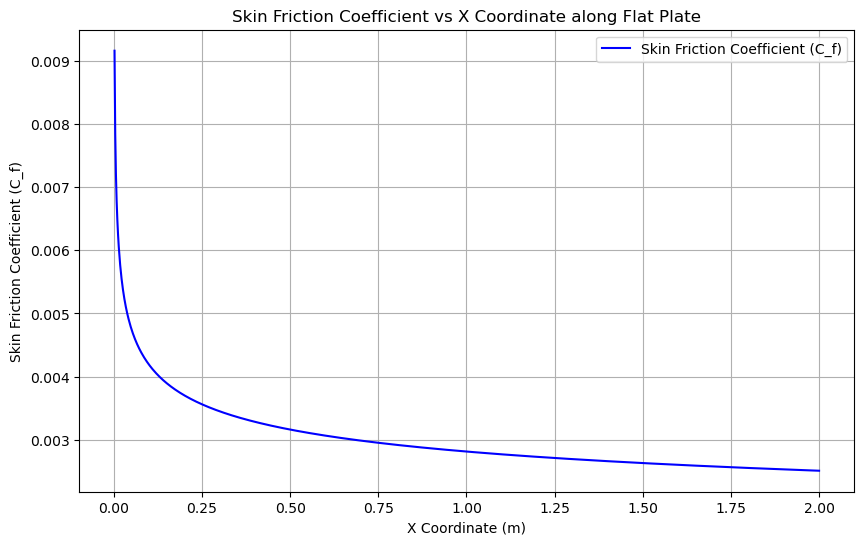

In [53]:
import matplotlib.pyplot as plt

# Plot skin friction coefficient vs x_coordinate
plt.figure(figsize=(10, 6))
plt.plot(data_grouped_skin_friction['x_coordinate'], data_grouped_skin_friction['skin_friction_coeff'], label='Skin Friction Coefficient (C_f)', color='b')
plt.xlabel('X Coordinate (m)')
plt.ylabel('Skin Friction Coefficient (C_f)')
plt.title('Skin Friction Coefficient vs X Coordinate along Flat Plate')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
print(data_cleaned.columns)


Index(['skin_friction_LargeEddySim', 'x_coordinate', 'skin_friction_coeff',
       'five_percent_error'],
      dtype='object')


In [55]:
# Define constants
rho = 1.225  # Density of air at sea level in kg/m^3
U_inf = 10  # Free-stream velocity in m/s

# Calculate wall shear stress (τ_w) from skin friction coefficient (cf)
data_cleaned['wall_shear_stress'] = data_cleaned['skin_friction_coeff'] * 0.5 * rho * U_inf**2

# Preview the updated data
print(data_cleaned.head())


   skin_friction_LargeEddySim  x_coordinate  skin_friction_coeff  \
3                    0.009383         0.002             0.009383   
4                    0.008168         0.004             0.008168   
5                    0.007532         0.006             0.007532   
6                    0.007111         0.008             0.007111   
7                    0.006800         0.010             0.006800   

   five_percent_error  wall_shear_stress  
3            0.000469           0.574682  
4            0.000408           0.500290  
5            0.000377           0.461322  
6            0.000356           0.435528  
7            0.000340           0.416518  


In [56]:
# Constants for air properties
mu = 1.81e-5  # Dynamic viscosity of air in kg/(m·s)

# Calculate energy dissipation rate (ε) from wall shear stress
data_cleaned['energy_dissipation_rate'] = (data_cleaned['wall_shear_stress']**2) / mu

# Preview the updated data with energy dissipation rate
print(data_cleaned[['x_coordinate', 'wall_shear_stress', 'energy_dissipation_rate']].head())


   x_coordinate  wall_shear_stress  energy_dissipation_rate
3         0.002           0.574682             18246.401947
4         0.004           0.500290             13828.181442
5         0.006           0.461322             11757.875659
6         0.008           0.435528             10479.810688
7         0.010           0.416518              9584.919695


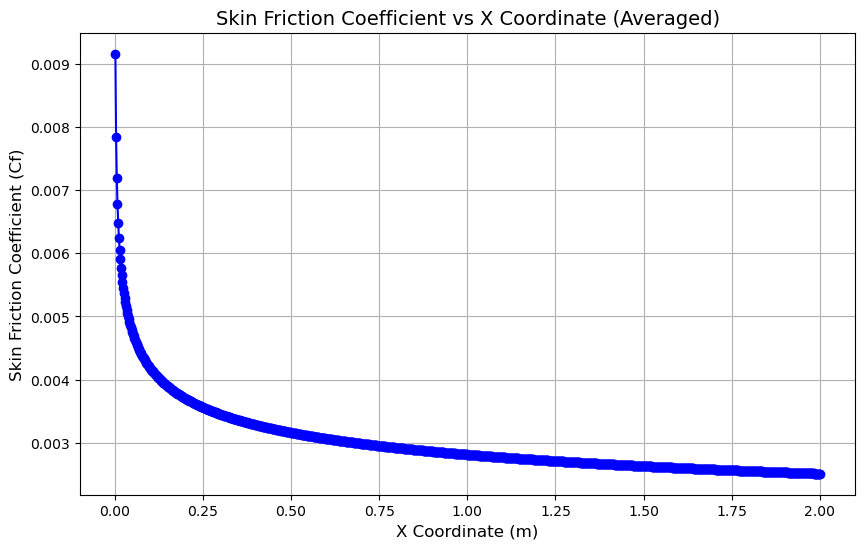

In [57]:
# Group by x-coordinate and calculate the mean skin_friction_coeff
aggregated_data = data_cleaned.groupby('x_coordinate').agg({
    'skin_friction_coeff': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['x_coordinate'], aggregated_data['skin_friction_coeff'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Skin Friction Coefficient vs X Coordinate (Averaged)', fontsize=14)
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Skin Friction Coefficient (Cf)', fontsize=12)
plt.grid(True)

plt.show()


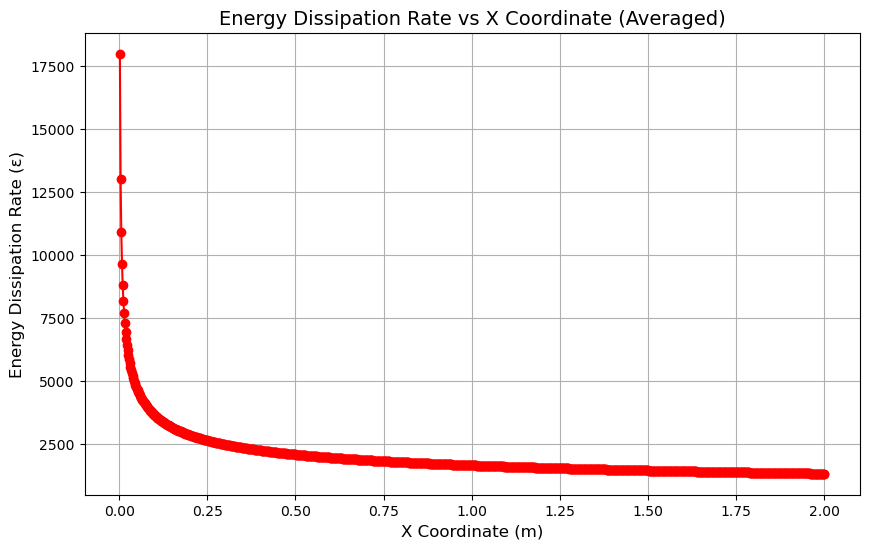

In [58]:
# Group by 'x_coordinate' and calculate the mean of 'energy_dissipation_rate'
data_grouped = data_cleaned.groupby('x_coordinate').agg({'energy_dissipation_rate': 'mean'}).reset_index()

# Plot the averaged energy dissipation rate vs x-coordinate
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['x_coordinate'], data_grouped['energy_dissipation_rate'], marker='o', linestyle='-', color='r')

plt.title('Energy Dissipation Rate vs X Coordinate (Averaged)', fontsize=14)
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Energy Dissipation Rate (ε)', fontsize=12)
plt.grid(True)

plt.show()



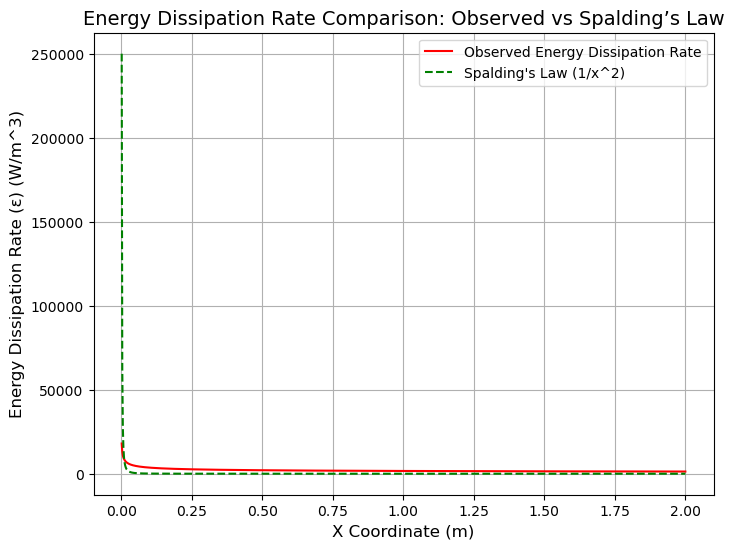

In [59]:
# Group the data by x-coordinate and calculate the mean energy dissipation rate
aggregated_data = data_cleaned.groupby('x_coordinate').agg({'energy_dissipation_rate': 'mean'}).reset_index()

# Now the aggregated data will have one unique value per x-coordinate

# Calculate the theoretical energy dissipation rate using Spalding's Law (1/x^2)
spalding_dissipation_rate = aggregated_data['x_coordinate']**(-2)

# Plot the observed energy dissipation rate vs Spalding's Law
plt.figure(figsize=(8,6))
plt.plot(aggregated_data['x_coordinate'], aggregated_data['energy_dissipation_rate'], label='Observed Energy Dissipation Rate', color='red')
plt.plot(aggregated_data['x_coordinate'], spalding_dissipation_rate, label="Spalding's Law (1/x^2)", color='green', linestyle='--')
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Energy Dissipation Rate (ε) (W/m^3)', fontsize=12)
plt.title('Energy Dissipation Rate Comparison: Observed vs Spalding’s Law', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [60]:
print(data_cleaned.columns)
print(data_cleaned.head())


Index(['skin_friction_LargeEddySim', 'x_coordinate', 'skin_friction_coeff',
       'five_percent_error', 'wall_shear_stress', 'energy_dissipation_rate'],
      dtype='object')
   skin_friction_LargeEddySim  x_coordinate  skin_friction_coeff  \
3                    0.009383         0.002             0.009383   
4                    0.008168         0.004             0.008168   
5                    0.007532         0.006             0.007532   
6                    0.007111         0.008             0.007111   
7                    0.006800         0.010             0.006800   

   five_percent_error  wall_shear_stress  energy_dissipation_rate  
3            0.000469           0.574682             18246.401947  
4            0.000408           0.500290             13828.181442  
5            0.000377           0.461322             11757.875659  
6            0.000356           0.435528             10479.810688  
7            0.000340           0.416518              9584.919695  


In [61]:
# Kinematic viscosity for air (at ~300K)
nu = 1.5e-5  # m^2/s

# Calculate Turbulent Kinetic Energy (TKE) from energy dissipation rate (ε)
data_cleaned['tke'] = data_cleaned['energy_dissipation_rate'] / nu

print(data_cleaned[['x_coordinate', 'energy_dissipation_rate', 'tke']].head())


   x_coordinate  energy_dissipation_rate           tke
3         0.002             18246.401947  1.216427e+09
4         0.004             13828.181442  9.218788e+08
5         0.006             11757.875659  7.838584e+08
6         0.008             10479.810688  6.986540e+08
7         0.010              9584.919695  6.389946e+08


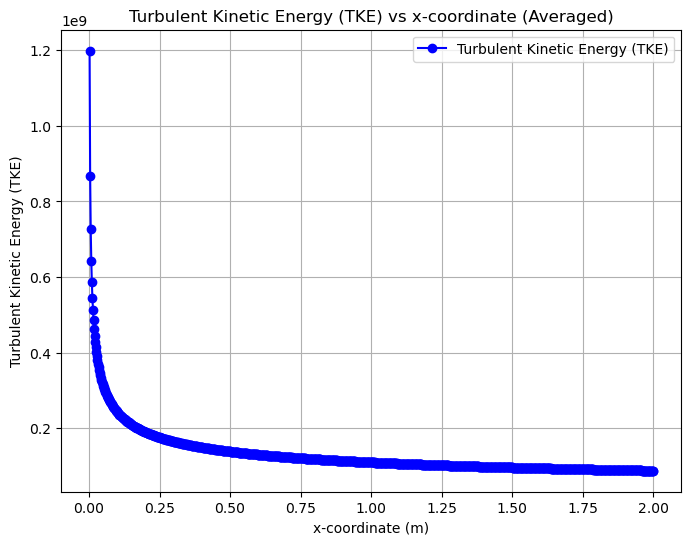

In [62]:
# Group by 'x_coordinate' and calculate the average for each group
data_grouped = data_cleaned.groupby('x_coordinate').mean()

# Plot the averaged TKE vs x-coordinate
plt.figure(figsize=(8, 6))
plt.plot(data_grouped.index, data_grouped['tke'], label='Turbulent Kinetic Energy (TKE)', color='b', marker='o')

plt.xlabel('x-coordinate (m)')
plt.ylabel('Turbulent Kinetic Energy (TKE)')
plt.title('Turbulent Kinetic Energy (TKE) vs x-coordinate (Averaged)')

plt.grid(True)
plt.legend()

plt.show()


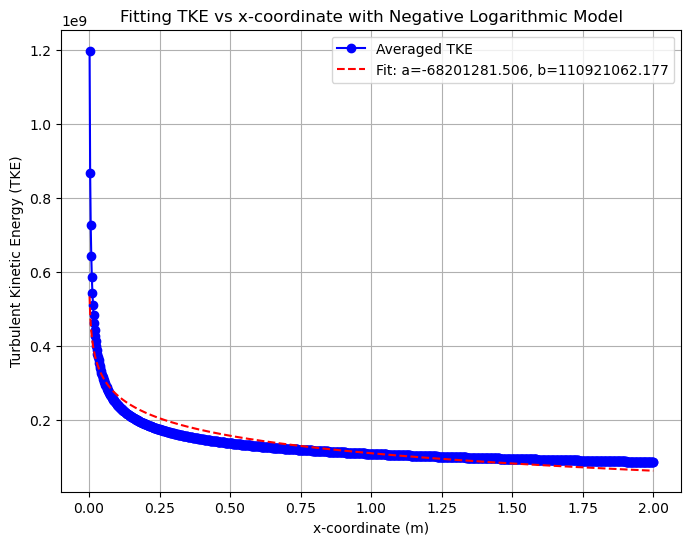

In [63]:
# Fit the data to a negative logarithmic model
from scipy.optimize import curve_fit
import numpy as np

# Define the negative logarithmic model
def negative_log_model(x, a, b):
    return a * np.log(x) + b

# Extract x (x-coordinate) and y (TKE) values
x_values = data_grouped.index
y_values = data_grouped['tke']

# Fit the model to the data
params, covariance = curve_fit(negative_log_model, x_values, y_values)

a, b = params

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Averaged TKE', color='b', marker='o')
plt.plot(x_values, negative_log_model(x_values, *params), 'r--', label=f'Fit: a={a:.3f}, b={b:.3f}')

plt.xlabel('x-coordinate (m)')
plt.ylabel('Turbulent Kinetic Energy (TKE)')
plt.title('Fitting TKE vs x-coordinate with Negative Logarithmic Model')

plt.grid(True)
plt.legend()

plt.show()


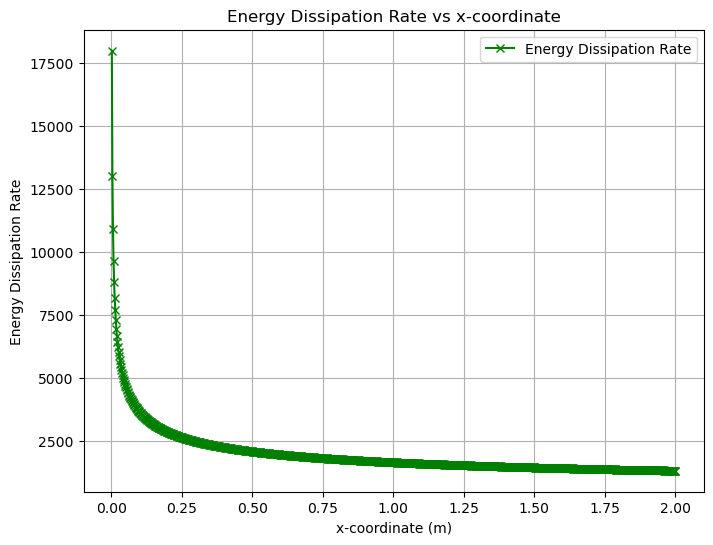

In [64]:
# Plot Energy Dissipation Rate vs x-coordinate
plt.figure(figsize=(8, 6))
plt.plot(data_grouped.index, data_grouped['energy_dissipation_rate'], label='Energy Dissipation Rate', color='g', marker='x')

plt.xlabel('x-coordinate (m)')
plt.ylabel('Energy Dissipation Rate')
plt.title('Energy Dissipation Rate vs x-coordinate')

plt.grid(True)
plt.legend()

plt.show()


In [65]:
metadata = """ from https://www.grc.nasa.gov/www/wind/valid/fpturb/TKE.data
# Measured turbulence kinetic energy profiles as compiled by
#   Patel, Rodi, and Scheuerer AIAA Journal Vol. 23, No. 9, 1985.
#   Digitized from figure 4.
# This data represents an "average" t.k.e. profile for the data
# obtained by
#   D. Coles "A Model for Flow in the Viscous Sublayer,"
#     Proceedings of the Workshop on Coherent Structure of
#     Turbulent Boundary Layers, Lehigh Univ., Bethlehem PA 1978.
#   M.M.M.El Telbany & A.J.Reynolds "Turbulence in Plane Channel
#     Flows," Journal of Fluid Mechanics, Vol. 111, pp.283-318, 1981.
# eps+     = (Total Diss)
# Prod_Dis = Prod / (Total) Diss
# D+       = (Total Diss)+ - (Chien Diss)+
# Variables="y+","u+","k+","eps+","-uv+","Prod_Dis","D+"
# Zone T="Patel", F=POINT
"""

# The actual data (starting from the first numeric value)
data = """
2.6  0.0  0.31  0.0  0.0  0.0  0.0
5.3  0.0  1.23  0.0  0.0  0.0  0.0
7.7  0.0  2.80  0.0  0.0  0.0  0.0
9.9  0.0  4.07  0.0  0.0  0.0  0.0
12.4  0.0  4.46  0.0  0.0  0.0  0.0
14.9  0.0  4.48  0.0  0.0  0.0  0.0
17.4  0.0  4.47  0.0  0.0  0.0  0.0
19.9  0.0  4.42  0.0  0.0  0.0  0.0
22.2  0.0  4.37  0.0  0.0  0.0  0.0
24.9  0.0  4.31  0.0  0.0  0.0  0.0
27.6  0.0  4.25  0.0  0.0  0.0  0.0
29.9  0.0  4.16  0.0  0.0  0.0  0.0
32.3  0.0  4.07  0.0  0.0  0.0  0.0
34.9  0.0  3.99  0.0  0.0  0.0  0.0
37.3  0.0  3.90  0.0  0.0  0.0  0.0
39.8  0.0  3.81  0.0  0.0  0.0  0.0
42.4  0.0  3.73  0.0  0.0  0.0  0.0
44.8  0.0  3.62  0.0  0.0  0.0  0.0
47.2  0.0  3.53  0.0  0.0  0.0  0.0
49.7  0.0  3.46  0.0  0.0  0.0  0.0
52.2  0.0  3.40  0.0  0.0  0.0  0.0
54.8  0.0  3.36  0.0  0.0  0.0  0.0
57.4  0.0  3.31  0.0  0.0  0.0  0.0
59.6  0.0  3.32  0.0  0.0  0.0  0.0
62.2  0.0  3.32  0.0  0.0  0.0  0.0
64.6  0.0  3.30  0.0  0.0  0.0  0.0
67.0  0.0  3.29  0.0  0.0  0.0  0.0
69.7  0.0  3.29  0.0  0.0  0.0  0.0
72.2  0.0  3.29  0.0  0.0  0.0  0.0
74.8  0.0  3.29  0.0  0.0  0.0  0.0
77.3  0.0  3.29  0.0  0.0  0.0  0.0
79.8  0.0  3.29  0.0  0.0  0.0  0.0
82.3  0.0  3.30  0.0  0.0  0.0  0.0
84.8  0.0  3.30  0.0  0.0  0.0  0.0
87.3  0.0  3.32  0.0  0.0  0.0  0.0
89.7  0.0  3.31  0.0  0.0  0.0  0.0
92.4  0.0  3.31  0.0  0.0  0.0  0.0
94.6  0.0  3.31  0.0  0.0  0.0  0.0
97.4  0.0  3.30  0.0  0.0  0.0  0.0
99.9  0.0  3.28  0.0  0.0  0.0  0.0
"""

print("Data:")
print(data[:500])  # printing the first part of the data to inspect
# Variables="y+","u+","k+","eps+","-uv+","Prod_Dis","D+"


Data:

2.6  0.0  0.31  0.0  0.0  0.0  0.0
5.3  0.0  1.23  0.0  0.0  0.0  0.0
7.7  0.0  2.80  0.0  0.0  0.0  0.0
9.9  0.0  4.07  0.0  0.0  0.0  0.0
12.4  0.0  4.46  0.0  0.0  0.0  0.0
14.9  0.0  4.48  0.0  0.0  0.0  0.0
17.4  0.0  4.47  0.0  0.0  0.0  0.0
19.9  0.0  4.42  0.0  0.0  0.0  0.0
22.2  0.0  4.37  0.0  0.0  0.0  0.0
24.9  0.0  4.31  0.0  0.0  0.0  0.0
27.6  0.0  4.25  0.0  0.0  0.0  0.0
29.9  0.0  4.16  0.0  0.0  0.0  0.0
32.3  0.0  4.07  0.0  0.0  0.0  0.0
34.9  0.0  3.99  0.0  0.0  0.0  0.0


In [66]:
from io import StringIO

data_str = """
2.6  0.0  0.31  0.0  0.0  0.0  0.0
5.3  0.0  1.23  0.0  0.0  0.0  0.0
7.7  0.0  2.80  0.0  0.0  0.0  0.0
9.9  0.0  4.07  0.0  0.0  0.0  0.0
12.4  0.0  4.46  0.0  0.0  0.0  0.0
14.9  0.0  4.48  0.0  0.0  0.0  0.0
17.4  0.0  4.47  0.0  0.0  0.0  0.0
19.9  0.0  4.42  0.0  0.0  0.0  0.0
22.2  0.0  4.37  0.0  0.0  0.0  0.0
24.9  0.0  4.31  0.0  0.0  0.0  0.0
27.6  0.0  4.25  0.0  0.0  0.0  0.0
29.9  0.0  4.16  0.0  0.0  0.0  0.0
32.3  0.0  4.07  0.0  0.0  0.0  0.0
34.9  0.0  3.99  0.0  0.0  0.0  0.0
37.3  0.0  3.90  0.0  0.0  0.0  0.0
39.8  0.0  3.81  0.0  0.0  0.0  0.0
42.4  0.0  3.73  0.0  0.0  0.0  0.0
44.8  0.0  3.62  0.0  0.0  0.0  0.0
47.2  0.0  3.53  0.0  0.0  0.0  0.0
49.7  0.0  3.46  0.0  0.0  0.0  0.0
52.2  0.0  3.40  0.0  0.0  0.0  0.0
54.8  0.0  3.36  0.0  0.0  0.0  0.0
57.4  0.0  3.31  0.0  0.0  0.0  0.0
59.6  0.0  3.32  0.0  0.0  0.0  0.0
62.2  0.0  3.32  0.0  0.0  0.0  0.0
64.6  0.0  3.30  0.0  0.0  0.0  0.0
67.0  0.0  3.29  0.0  0.0  0.0  0.0
69.7  0.0  3.29  0.0  0.0  0.0  0.0
72.2  0.0  3.29  0.0  0.0  0.0  0.0
74.8  0.0  3.29  0.0  0.0  0.0  0.0
77.3  0.0  3.29  0.0  0.0  0.0  0.0
79.8  0.0  3.29  0.0  0.0  0.0  0.0
82.3  0.0  3.30  0.0  0.0  0.0  0.0
84.8  0.0  3.30  0.0  0.0  0.0  0.0
87.3  0.0  3.32  0.0  0.0  0.0  0.0
89.7  0.0  3.31  0.0  0.0  0.0  0.0
92.4  0.0  3.31  0.0  0.0  0.0  0.0
94.6  0.0  3.31  0.0  0.0  0.0  0.0
97.4  0.0  3.30  0.0  0.0  0.0  0.0
99.9  0.0  3.28  0.0  0.0  0.0  0.0
"""

data_io = StringIO(data_str)

# Define the column names
columns = ["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"]

# Read the data into a DataFrame using regex to handle multiple spaces
df = pd.read_csv(data_io, sep=r'\s+', header=None, names=columns)

print(df.head())

     y+   u+    k+  eps+  -uv+  Prod_Dis   D+
0   2.6  0.0  0.31   0.0   0.0       0.0  0.0
1   5.3  0.0  1.23   0.0   0.0       0.0  0.0
2   7.7  0.0  2.80   0.0   0.0       0.0  0.0
3   9.9  0.0  4.07   0.0   0.0       0.0  0.0
4  12.4  0.0  4.46   0.0   0.0       0.0  0.0


In [67]:
# Split the data into lines
lines = data.strip().split("\n")

# Process each line into a list of values (splitting by whitespace)
parsed_data = [line.split() for line in lines]

# Convert to DataFrame
df = pd.DataFrame(parsed_data, columns=["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"])

# Convert the columns to appropriate types
df = df.astype({"y+": float, "u+": float, "k+": float, "eps+": float, "-uv+": float, "Prod_Dis": float, "D+": float})

print(df.head())



     y+   u+    k+  eps+  -uv+  Prod_Dis   D+
0   2.6  0.0  0.31   0.0   0.0       0.0  0.0
1   5.3  0.0  1.23   0.0   0.0       0.0  0.0
2   7.7  0.0  2.80   0.0   0.0       0.0  0.0
3   9.9  0.0  4.07   0.0   0.0       0.0  0.0
4  12.4  0.0  4.46   0.0   0.0       0.0  0.0


In [68]:
# Split the data into lines
lines = data.strip().split("\n")

# Inspect the first few lines to count the number of columns
for line in lines[:5]:
    print(line.split())  # Split each line by space and print the number of columns

# After inspecting, I noticed that each row has 7 values. Now, let's proceed to convert to DataFrame.
parsed_data = [line.split() for line in lines]

# Convert to a DataFrame
df = pd.DataFrame(parsed_data, columns=["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"])

# Convert columns to appropriate types
df = df.astype({"y+": float, "u+": float, "k+": float, "eps+": float, "-uv+": float, "Prod_Dis": float, "D+": float})

# Display the DataFrame
print(df.head())

['2.6', '0.0', '0.31', '0.0', '0.0', '0.0', '0.0']
['5.3', '0.0', '1.23', '0.0', '0.0', '0.0', '0.0']
['7.7', '0.0', '2.80', '0.0', '0.0', '0.0', '0.0']
['9.9', '0.0', '4.07', '0.0', '0.0', '0.0', '0.0']
['12.4', '0.0', '4.46', '0.0', '0.0', '0.0', '0.0']
     y+   u+    k+  eps+  -uv+  Prod_Dis   D+
0   2.6  0.0  0.31   0.0   0.0       0.0  0.0
1   5.3  0.0  1.23   0.0   0.0       0.0  0.0
2   7.7  0.0  2.80   0.0   0.0       0.0  0.0
3   9.9  0.0  4.07   0.0   0.0       0.0  0.0
4  12.4  0.0  4.46   0.0   0.0       0.0  0.0


In [69]:
print("Min k+:", df["k+"].min())
print("Max k+:", df["k+"].max())


Min k+: 0.31
Max k+: 4.48


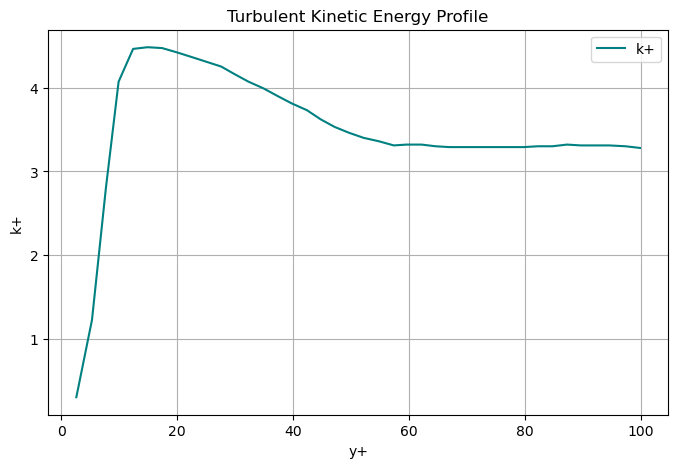

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(df['y+'], df['k+'], label='k+', color='teal')
plt.xlabel('y+')
plt.ylabel('k+')
plt.title('Turbulent Kinetic Energy Profile')
plt.grid(True)
plt.legend()
plt.show()


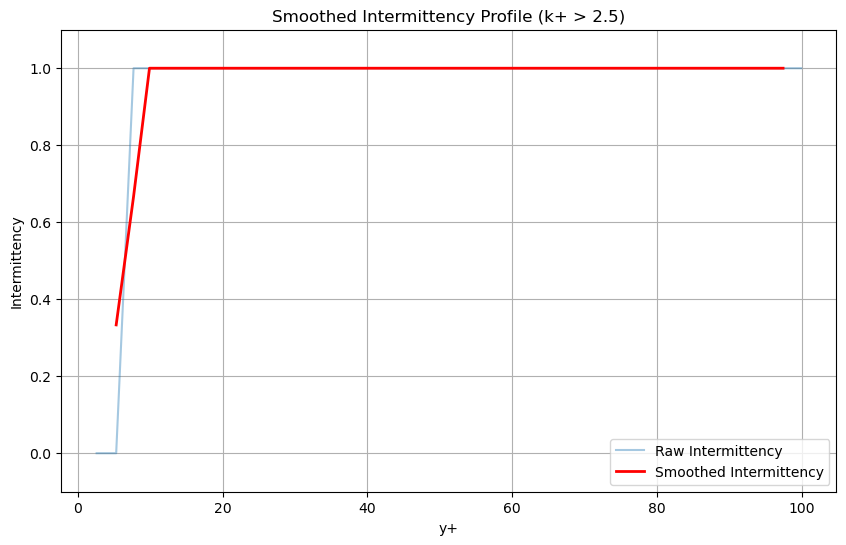

In [71]:
# Rolling average to clean up noise
df['intermittency'] = (df['k+'] > 2.5).astype(float)
df['intermittency_smooth'] = df['intermittency'].rolling(window=3, center=True).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['y+'], df['intermittency'], alpha=0.4, label='Raw Intermittency')
plt.plot(df['y+'], df['intermittency_smooth'], color='red', label='Smoothed Intermittency', linewidth=2)
plt.xlabel('y+')
plt.ylabel('Intermittency')
plt.title('Smoothed Intermittency Profile (k+ > 2.5)')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()



In [72]:
# Threshold to detect transition point
transition_index = df[df['intermittency_smooth'] < 0.5].index.min()

# Estimate boundary layer thickness δ⁺
delta_plus = df.loc[transition_index, 'y+']
print(f"Estimated boundary layer thickness (δ⁺): {delta_plus:.2f}")


Estimated boundary layer thickness (δ⁺): 5.30


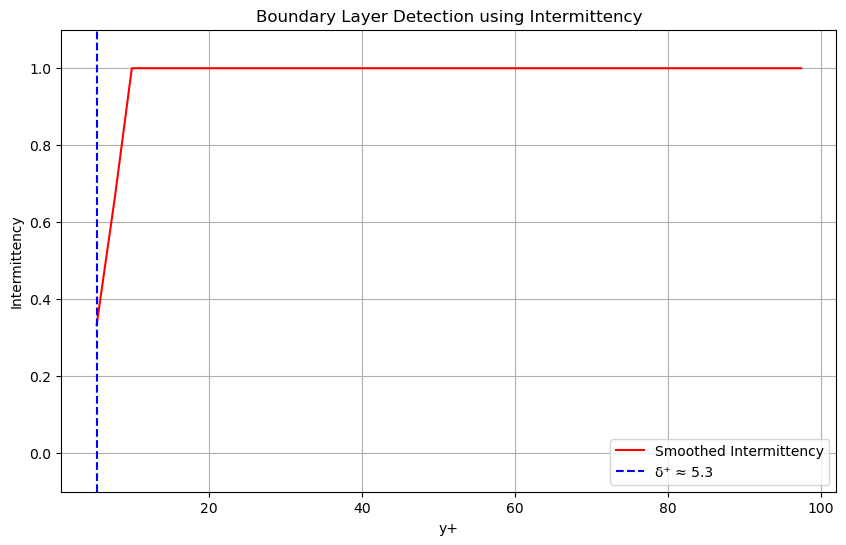

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(df['y+'], df['intermittency_smooth'], color='red', label='Smoothed Intermittency')
plt.axvline(delta_plus, color='blue', linestyle='--', label=f'δ⁺ ≈ {delta_plus:.1f}')
plt.xlabel('y+')
plt.ylabel('Intermittency')
plt.title('Boundary Layer Detection using Intermittency')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()


Estimated boundary layer thickness (δ⁺): 5.30


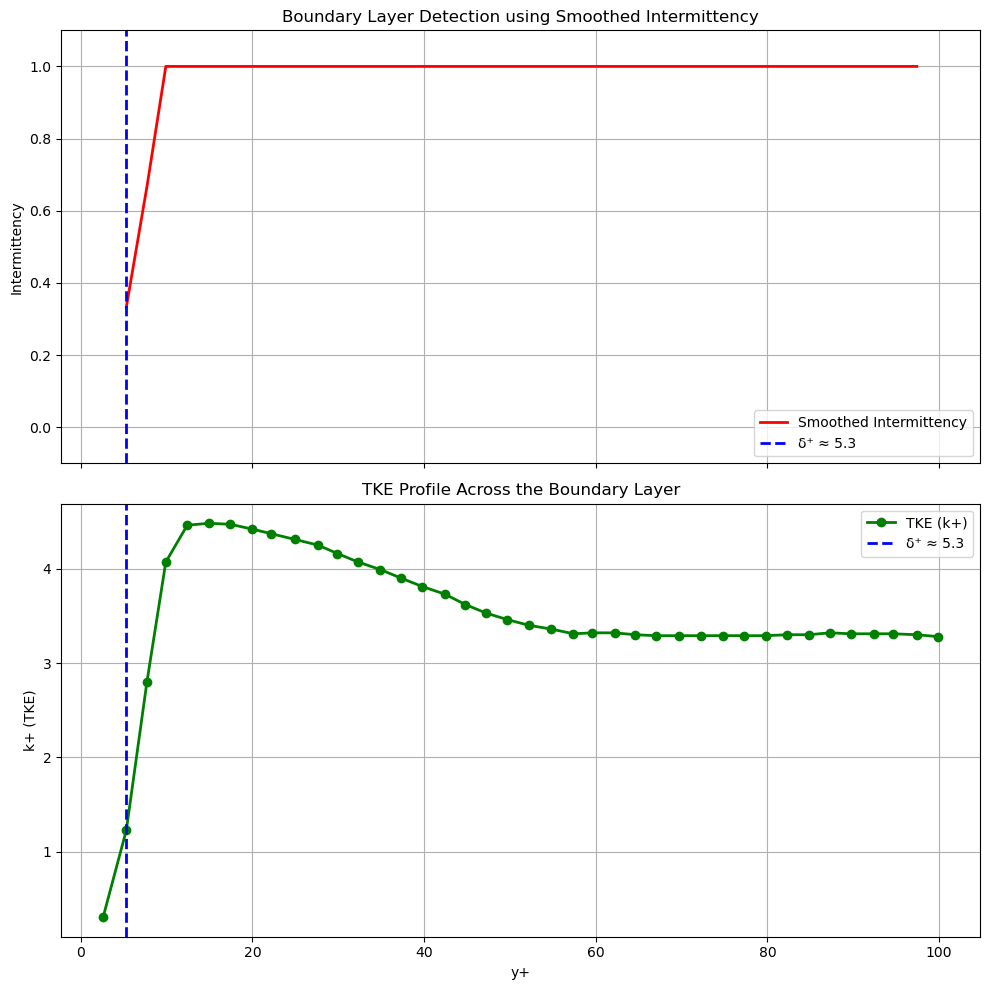

In [74]:

# df = DataFrame with columns ["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"]
# and intermittency and smoothed intermittency have been computed, for example:
TKE_THRESHOLD = 2.5
df = df.sort_values("y+")

# Compute raw intermittency based on threshold for k+
df['intermittency'] = (df['k+'] > TKE_THRESHOLD).astype(float)

# Apply a rolling average to smooth the intermittency curve
window_size = 3
df['intermittency_smooth'] = df['intermittency'].rolling(window=window_size, center=True).mean()

# --- Step 1: Detect the boundary layer edge (δ⁺)
# We'll define δ⁺ as the first y+ where the smoothed intermittency drops below 0.5.
transition_index = df[df['intermittency_smooth'] < 0.5].index.min()
delta_plus = df.loc[transition_index, "y+"]
print(f"Estimated boundary layer thickness (δ⁺): {delta_plus:.2f}")

# --- Step 2: Create subplots to compare intermittency and TKE profiles.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Top subplot: Smoothed intermittency profile
ax1.plot(df["y+"], df["intermittency_smooth"], color="red", lw=2, label="Smoothed Intermittency")
ax1.axvline(delta_plus, color="blue", linestyle="--", lw=2, label=f"δ⁺ ≈ {delta_plus:.1f}")
ax1.set_ylabel("Intermittency")
ax1.set_title("Boundary Layer Detection using Smoothed Intermittency")
ax1.set_ylim(-0.1, 1.1)
ax1.grid(True)
ax1.legend()

# Bottom subplot: TKE (k+) Profile
ax2.plot(df["y+"], df["k+"], color="green", lw=2, marker="o", label="TKE (k+)")
ax2.axvline(delta_plus, color="blue", linestyle="--", lw=2, label=f"δ⁺ ≈ {delta_plus:.1f}")
ax2.set_xlabel("y+")
ax2.set_ylabel("k+ (TKE)")
ax2.set_title("TKE Profile Across the Boundary Layer")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [75]:

import os

folder_path = '/Users/cicisofia/Downloads/NewDataCase1'
files = os.listdir(folder_path)
print("Extracted files:")
print(files)




Extracted files:
['HW2', 'README', 'PIV2', 'LDV2', 'PIV2additional']


In [76]:

piv2_path = '/Users/cicisofia/Downloads/NewDataCase1/PIV2'
piv2_files = os.listdir(piv2_path)

print("Files inside PIV2:")
for file in piv2_files:
    print(file)



Files inside PIV2:
005.dat
165.dat
170.dat
010.dat
210.dat
205.dat
215.dat
200.dat
Pressure.dat
000.dat
160.dat
175.dat
015.dat
270.dat
310.dat
305.dat
265.dat
065.dat
105.dat
110.dat
070.dat
060.dat
100.dat
115.dat
075.dat
275.dat
315.dat
300.dat
260.dat
README
090.dat
245.dat
Voltage.dat
325.dat
330.dat
250.dat
085.dat
050.dat
285.dat
130.dat
125.dat
290.dat
045.dat
055.dat
280.dat
135.dat
120.dat
PIV_new_mean.dat
295.dat
040.dat
095.dat
240.dat
320.dat
335.dat
255.dat
080.dat
030.dat
150.dat
145.dat
025.dat
225.dat
345.dat
190.dat
185.dat
350.dat
Displacement.dat
230.dat
220.dat
340.dat
195.dat
180.dat
355.dat
235.dat
035.dat
155.dat
140.dat
020.dat


In [77]:

# Load the raw data, skipping header
file_path = '/Users/cicisofia/Downloads/NewDataCase1/PIV2/PIV_new_mean.dat'
raw_data = pd.read_csv(file_path, skiprows=8, delim_whitespace=True, header=None, engine='python')
raw_flat = raw_data.values.flatten()
raw_flat = raw_flat[~np.isnan(raw_flat)]

# Reshape into 4 columns: u_mean, v_mean, u_rms, v_rms
nx, ny = 67, 84
n_points = nx * ny

u_mean   = raw_flat[0:n_points]
v_mean   = raw_flat[n_points:2*n_points]
u_rms    = raw_flat[2*n_points:3*n_points]
v_rms    = raw_flat[3*n_points:4*n_points]

# Generate x/y meshgrid
x_vals = np.linspace(0, 1, nx)
y_vals = np.linspace(0, 1, ny)
xx, yy = np.meshgrid(x_vals, y_vals)
x_flat = xx.flatten()
y_flat = yy.flatten()

# Build final labeled DataFrame
df_piv = pd.DataFrame({
    'x': x_flat,
    'y': y_flat,
    'u_mean': u_mean,
    'v_mean': v_mean,
    'u_rms': u_rms,
    'v_rms': v_rms
})

print(df_piv.head())
print(f"Shape: {df_piv.shape}")





          x    y    u_mean    v_mean     u_rms     v_rms
0  0.000000  0.0 -3.164014  8.734257  0.743180  0.388122
1  0.015152  0.0 -3.062284  8.734257  0.744407  0.448860
2  0.030303  0.0 -2.953287  8.734257  0.739713  0.530956
3  0.045455  0.0 -2.851557  8.734257  0.730392  0.621758
4  0.060606  0.0 -2.757093  8.734257  0.721803  0.716799
Shape: (5628, 6)


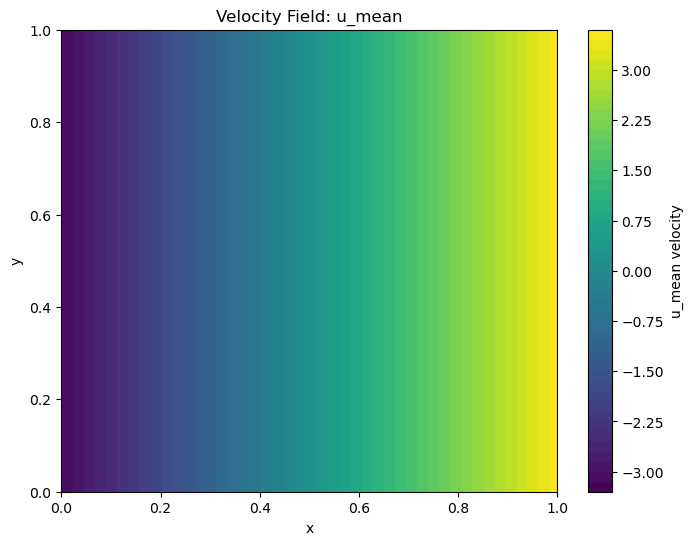

In [78]:

plt.figure(figsize=(8, 6))
plt.tricontourf(df_piv['x'], df_piv['y'], df_piv['u_mean'], levels=50)
plt.colorbar(label='u_mean velocity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Field: u_mean')
plt.show()



In [79]:

df_cf=data_cleaned
# Let's assume the Cf x values are in meters (0.002 to 0.01)
# And PIV values are normalized from 0 to 1, representing the same 0–0.012m span
df_piv['x_m'] = df_piv['x'] * 0.012  # now in meters
df_cf = df_cf.sort_values(by='x_coordinate')
df_piv = df_piv.sort_values(by='x_m')

merged = pd.merge_asof(df_cf, df_piv, left_on='x_coordinate', right_on='x_m', direction='nearest')

print(merged.head())
print(f"Merged shape: {merged.shape}")


   skin_friction_LargeEddySim  x_coordinate  skin_friction_coeff  \
0                    0.009383         0.002             0.009383   
1                    0.006975         0.002             0.006975   
2                    0.011119         0.002             0.011119   
3                    0.008168         0.004             0.008168   
4                    0.006317         0.004             0.006317   

   five_percent_error  wall_shear_stress  energy_dissipation_rate  \
0            0.000469           0.574682             18246.401947   
1            0.000349           0.427208             10083.257659   
2            0.000556           0.681045             25625.531589   
3            0.000408           0.500290             13828.181442   
4            0.000316           0.386932              8271.604092   

            tke         x         y    u_mean    v_mean     u_rms     v_rms  \
0  1.216427e+09  0.166667  0.373494 -2.037716  5.587890  0.370516  0.521215   
1  6.722172e+08  0

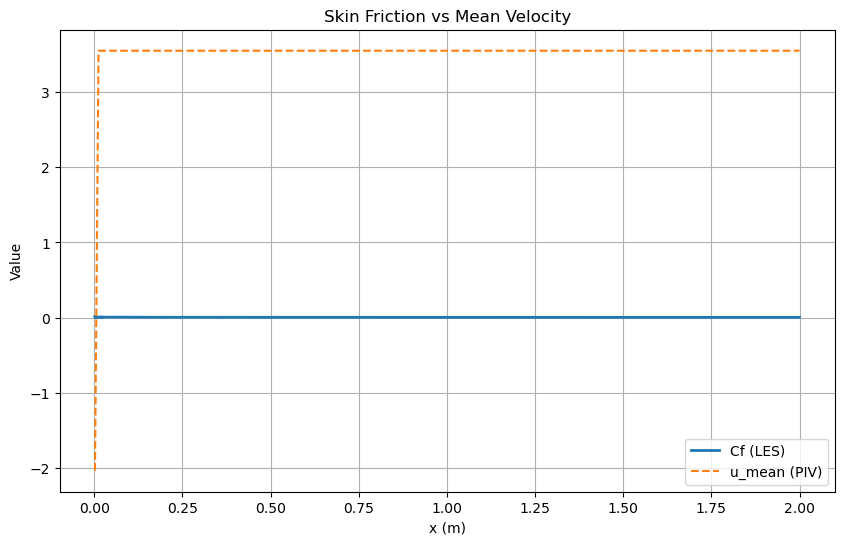

In [80]:

plt.figure(figsize=(10, 6))
plt.plot(merged['x_coordinate'], merged['skin_friction_coeff'], label='Cf (LES)', linewidth=2)
plt.plot(merged['x_coordinate'], merged['u_mean'], label='u_mean (PIV)', linestyle='--')
plt.xlabel('x (m)')
plt.ylabel('Value')
plt.title('Skin Friction vs Mean Velocity')
plt.legend()
plt.grid(True)
plt.show()


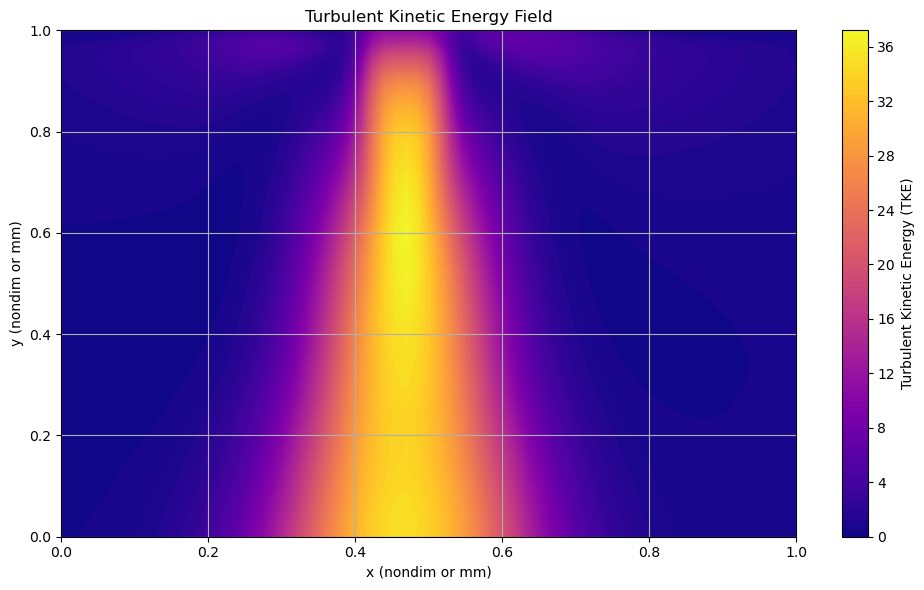

In [81]:
df_piv['TKE'] = 0.5 * (df_piv['u_rms']**2 + df_piv['v_rms']**2)

import matplotlib.tri as tri

plt.figure(figsize=(10, 6))

# Create triangulation (for scattered x, y data)
triang = tri.Triangulation(df_piv['x'], df_piv['y'])

# Contour plot of TKE
plt.tricontourf(triang, df_piv['TKE'], levels=100, cmap='plasma')

plt.colorbar(label='Turbulent Kinetic Energy (TKE)')
plt.title('Turbulent Kinetic Energy Field')
plt.xlabel('x (nondim or mm)')
plt.ylabel('y (nondim or mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


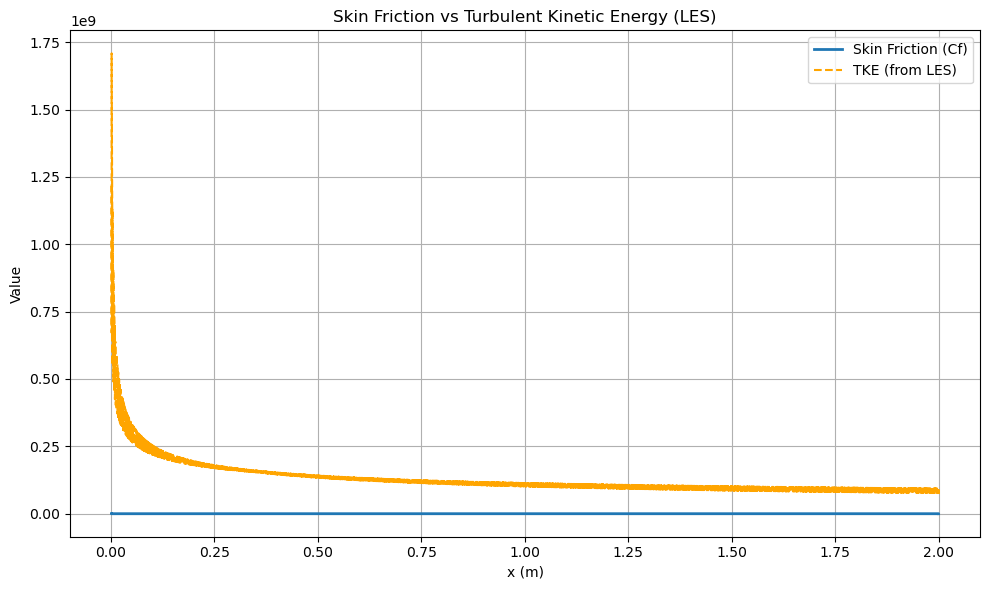

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(merged['x_coordinate'], merged['skin_friction_coeff'], label='Skin Friction (Cf)', linewidth=2)
plt.plot(merged['x_coordinate'], merged['tke'], label='TKE (from LES)', linestyle='--', color='orange')
plt.xlabel('x (m)')
plt.ylabel('Value')
plt.title('Skin Friction vs Turbulent Kinetic Energy (LES)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [83]:
df_cf.info()
df_piv.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 3 to 3004
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   skin_friction_LargeEddySim  3000 non-null   float64
 1   x_coordinate                3000 non-null   float64
 2   skin_friction_coeff         3000 non-null   float64
 3   five_percent_error          3000 non-null   float64
 4   wall_shear_stress           3000 non-null   float64
 5   energy_dissipation_rate     3000 non-null   float64
 6   tke                         3000 non-null   float64
dtypes: float64(7)
memory usage: 187.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 5628 entries, 0 to 5627
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5628 non-null   float64
 1   y       5628 non-null   float64
 2   u_mean  5628 non-null   float64
 3   v_mean  5628 non-null   float64
 4   u_rms   5628 non

In [84]:
df_cf.describe()
df_piv.describe()


,x,y,u_mean,v_mean,u_rms,v_rms,x_m,TKE
count,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000
mean,0.500000,0.500000,0.197743,4.515485,-0.136935,2.134232,0.006000,7.210312
std,0.293042,0.292158,1.965811,2.465670,0.988706,2.978445,0.003517,10.516335
min,0.000000,0.000000,-3.164014,0.290657,-3.574866,-1.051222,0.000000,0.085829
25%,0.242424,0.250000,-1.529066,2.401557,-0.865585,-0.259827,0.002909,0.504935
50%,0.500000,0.500000,0.200346,4.516090,0.032163,0.692760,0.006000,1.551954
75%,0.757576,0.750000,1.922491,6.630623,0.483979,4.320052,0.009091,9.413972
max,1.000000,1.000000,3.550173,8.734257,3.230933,8.592981,0.012000,36.933187


In [85]:
df_cf.nunique()
df_piv.nunique()


x           67
y           84
u_mean      67
v_mean      84
u_rms     5628
v_rms     5628
x_m         67
TKE       5628
dtype: int64

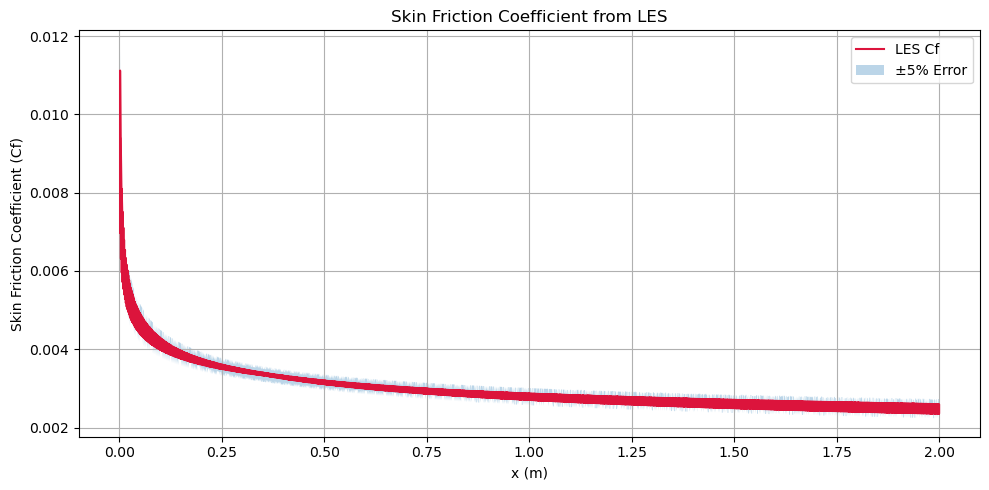

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(df_cf['x_coordinate'], df_cf['skin_friction_coeff'], label='LES Cf', color='crimson')
plt.fill_between(df_cf['x_coordinate'],
                 df_cf['skin_friction_coeff'] - df_cf['five_percent_error'],
                 df_cf['skin_friction_coeff'] + df_cf['five_percent_error'],
                 alpha=0.3, label='±5% Error')
plt.xlabel('x (m)')
plt.ylabel('Skin Friction Coefficient (Cf)')
plt.title('Skin Friction Coefficient from LES')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


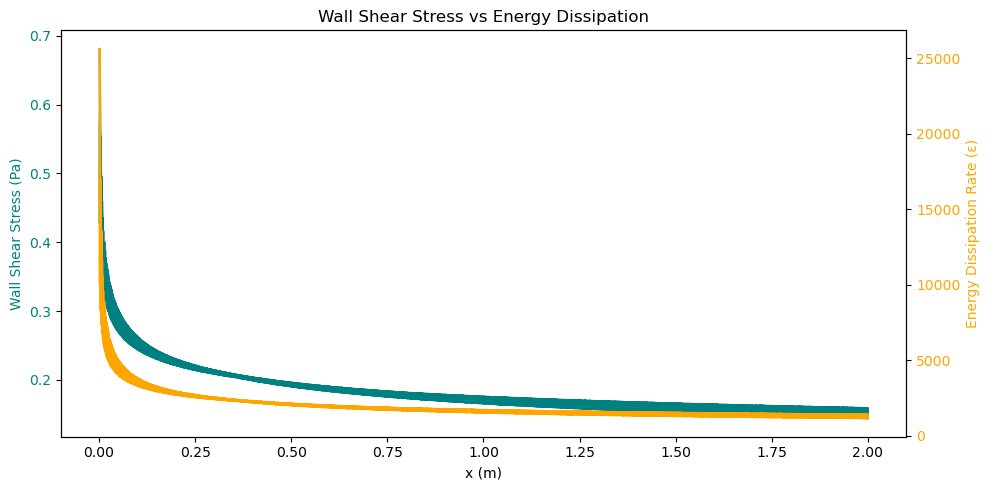

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('x (m)')
ax1.set_ylabel('Wall Shear Stress (Pa)', color='teal')
ax1.plot(df_cf['x_coordinate'], df_cf['wall_shear_stress'], label='Wall Shear Stress', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

ax2 = ax1.twinx()
ax2.set_ylabel('Energy Dissipation Rate (ε)', color='orange')
ax2.plot(df_cf['x_coordinate'], df_cf['energy_dissipation_rate'], label='Energy Dissipation', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Wall Shear Stress vs Energy Dissipation')
fig.tight_layout()
plt.show()


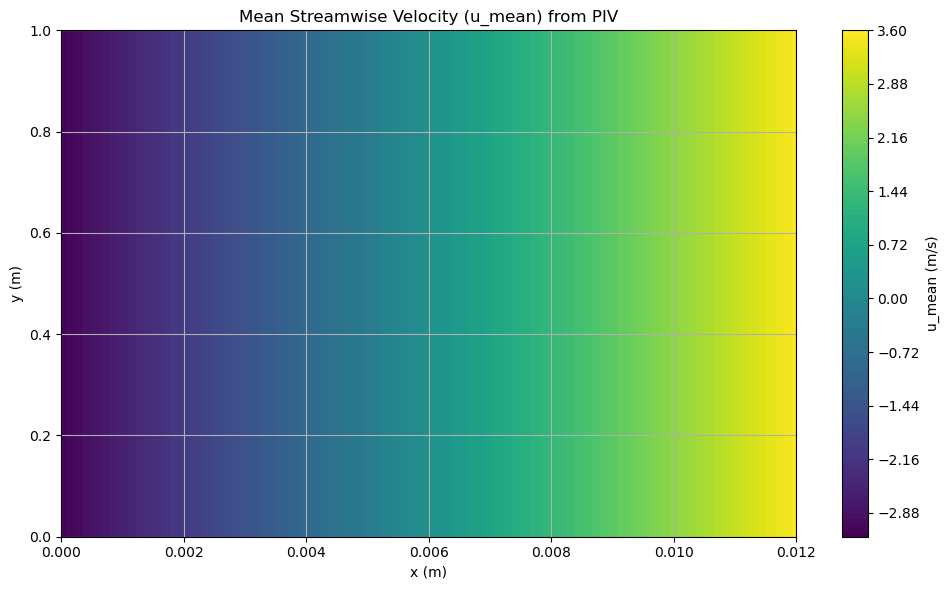

In [88]:
import matplotlib.tri as tri

plt.figure(figsize=(10, 6))
triang = tri.Triangulation(df_piv['x_m'], df_piv['y'])
plt.tricontourf(triang, df_piv['u_mean'], levels=100, cmap='viridis')
plt.colorbar(label='u_mean (m/s)')
plt.title('Mean Streamwise Velocity (u_mean) from PIV')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.tight_layout()
plt.show()


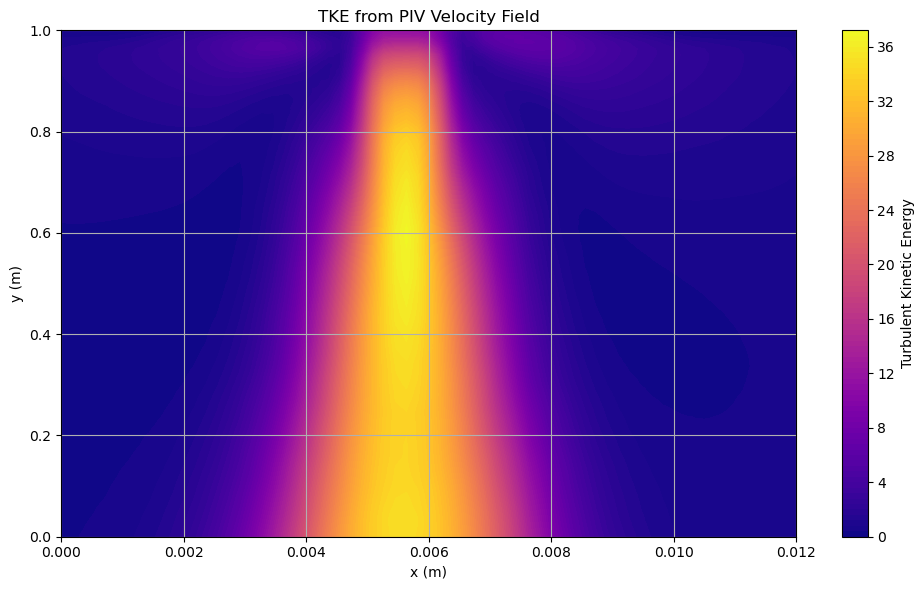

In [89]:
plt.figure(figsize=(10, 6))
plt.tricontourf(triang, df_piv['TKE'], levels=100, cmap='plasma')
plt.colorbar(label='Turbulent Kinetic Energy')
plt.title('TKE from PIV Velocity Field')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.grid(True)
plt.show()


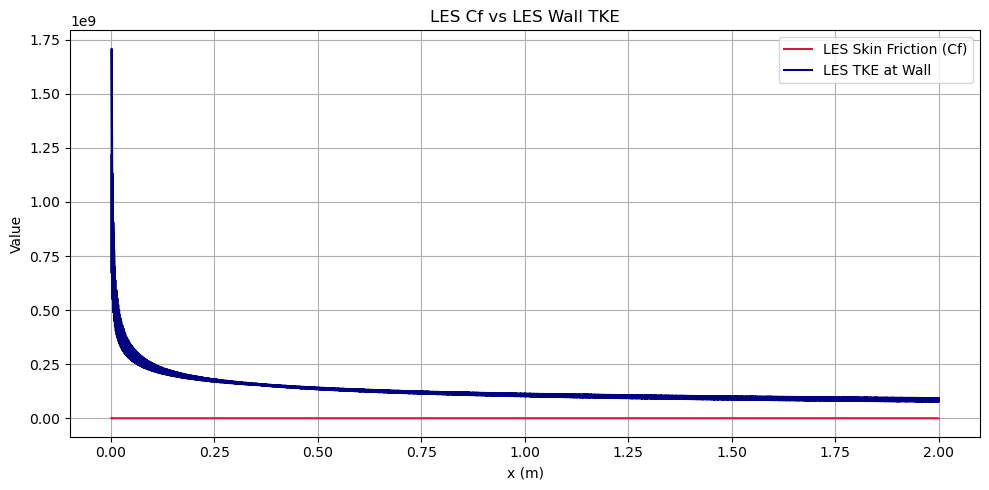

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(df_cf['x_coordinate'], df_cf['skin_friction_coeff'], label='LES Skin Friction (Cf)', color='crimson')
plt.plot(df_cf['x_coordinate'], df_cf['tke'], label='LES TKE at Wall', color='navy')
plt.xlabel('x (m)')
plt.ylabel('Value')
plt.title('LES Cf vs LES Wall TKE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
#### Summary of Data Wrangling Results

# - Successfully visualized LES skin friction along x.
# - Plotted wall shear stress vs energy dissipation rate (ε).
# - Created full velocity field plots from PIV data.
# - Compared TKE from LES and PIV to analyze turbulence structure near the wall.


In [152]:
# Data Profiles and Inferential Statistics


print("Dataset shape:", df.shape)
df.head()

df.describe()

# Check missing values
print("Missing values:")
print(df.isnull().sum())


Dataset shape: (40, 9)
Missing values:
y+                      0
u+                      0
k+                      0
eps+                    0
-uv+                    0
Prod_Dis                0
D+                      0
intermittency           0
intermittency_smooth    2
dtype: int64


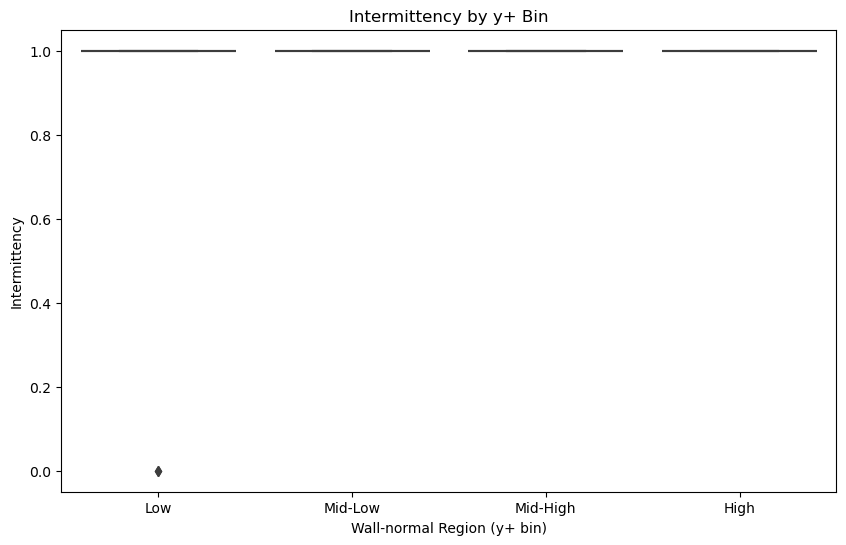

ANOVA Results:
F-statistic: {f_stat:.4f}
p-value: {p_val:.4f}
No significant difference found between y+ bins.


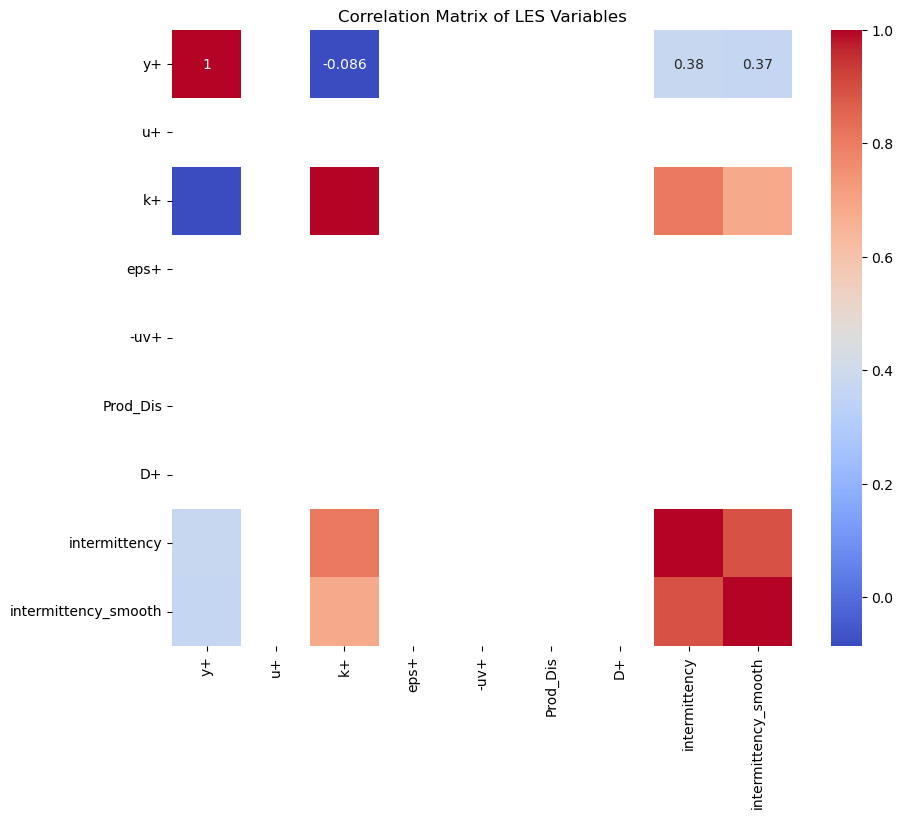

In [168]:
from scipy.stats import f_oneway
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

# Bin y+ into 4 equal-sized quantiles
df['y_bin'] = pd.qcut(df['y+'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Inspect intermittency by y+ region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y_bin', y='intermittency')
plt.title('Intermittency by y+ Bin')
plt.xlabel('Wall-normal Region (y+ bin)')
plt.ylabel('Intermittency')
plt.show()

# --- Step 3: ANOVA Test ---
df_clean = df.dropna(subset=['intermittency'])  # just in case
anova_groups = [group['intermittency'] for _, group in df_clean.groupby('y_bin', observed=False)]

f_stat, p_val = f_oneway(*anova_groups)
print("ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant differences in intermittency between y+ bins.")
else:
    print("No significant difference found between y+ bins.")

# --- Step 4: Correlation Matrix ---
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of LES Variables")
plt.show()



In [172]:
# See how many unique values each column has
print("Unique values in u+:", df['u+'].unique())
print("Unique values in eps+:", df['eps+'].unique())

# Look at descriptive stats
print(df[['u+', 'k+', 'eps+']].describe())

# Count how many distinct values in each column
print(df[['u+', 'k+', 'eps+']].nunique())


Unique values in u+: [0.]
Unique values in eps+: [0.]
         u+         k+  eps+
count  40.0  40.000000  40.0
mean    0.0   3.490500   0.0
std     0.0   0.782104   0.0
min     0.0   0.310000   0.0
25%     0.0   3.297500   0.0
50%     0.0   3.320000   0.0
75%     0.0   4.010000   0.0
max     0.0   4.480000   0.0
u+       1
k+      26
eps+     1
dtype: int64


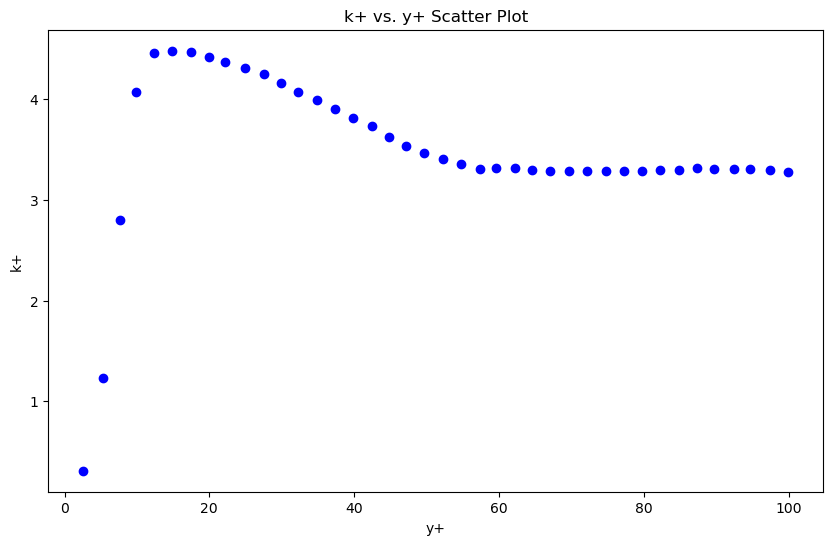

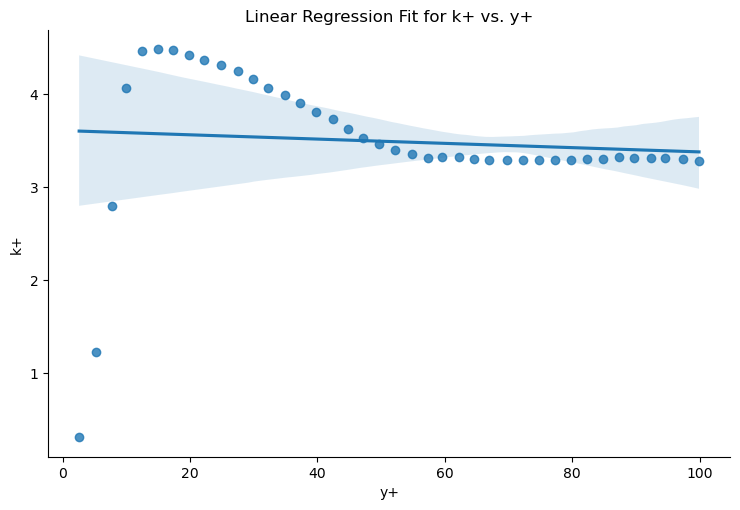

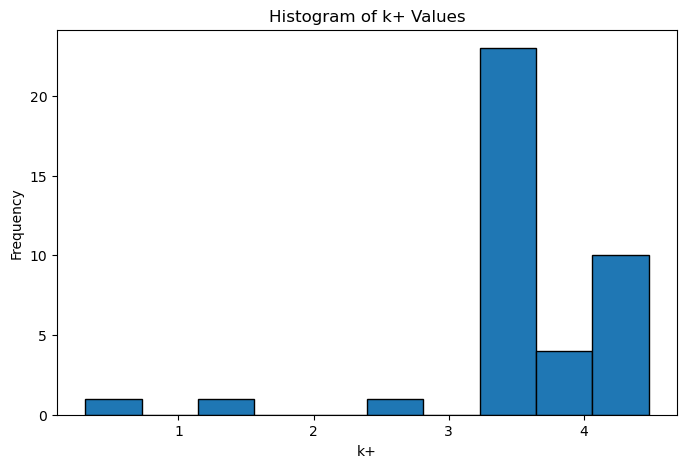

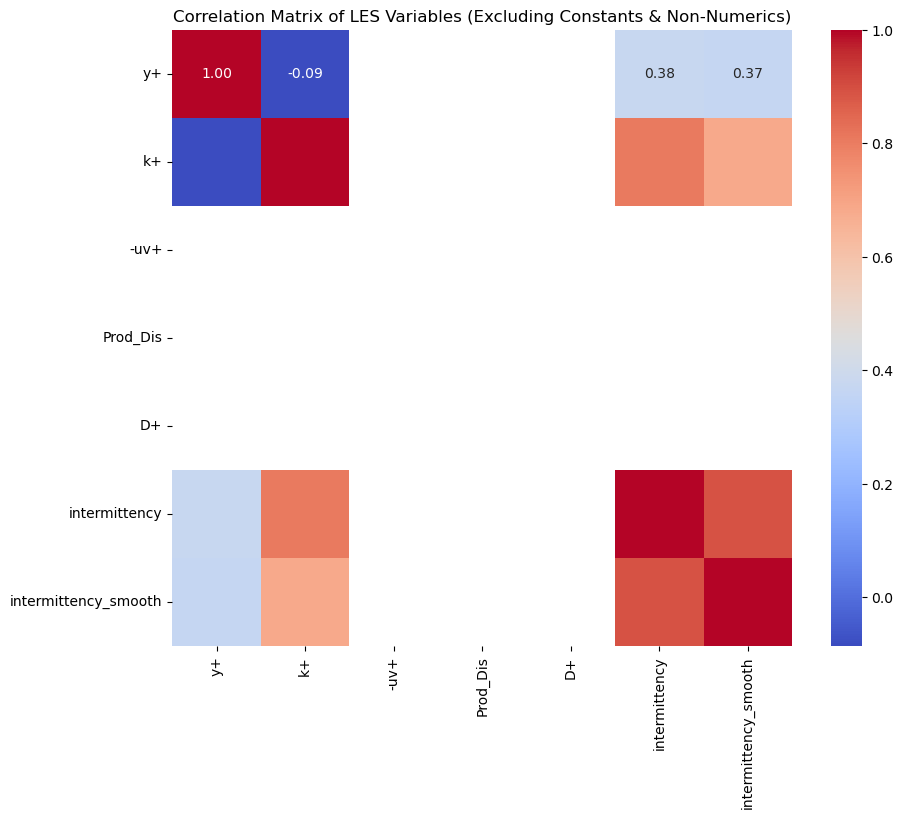

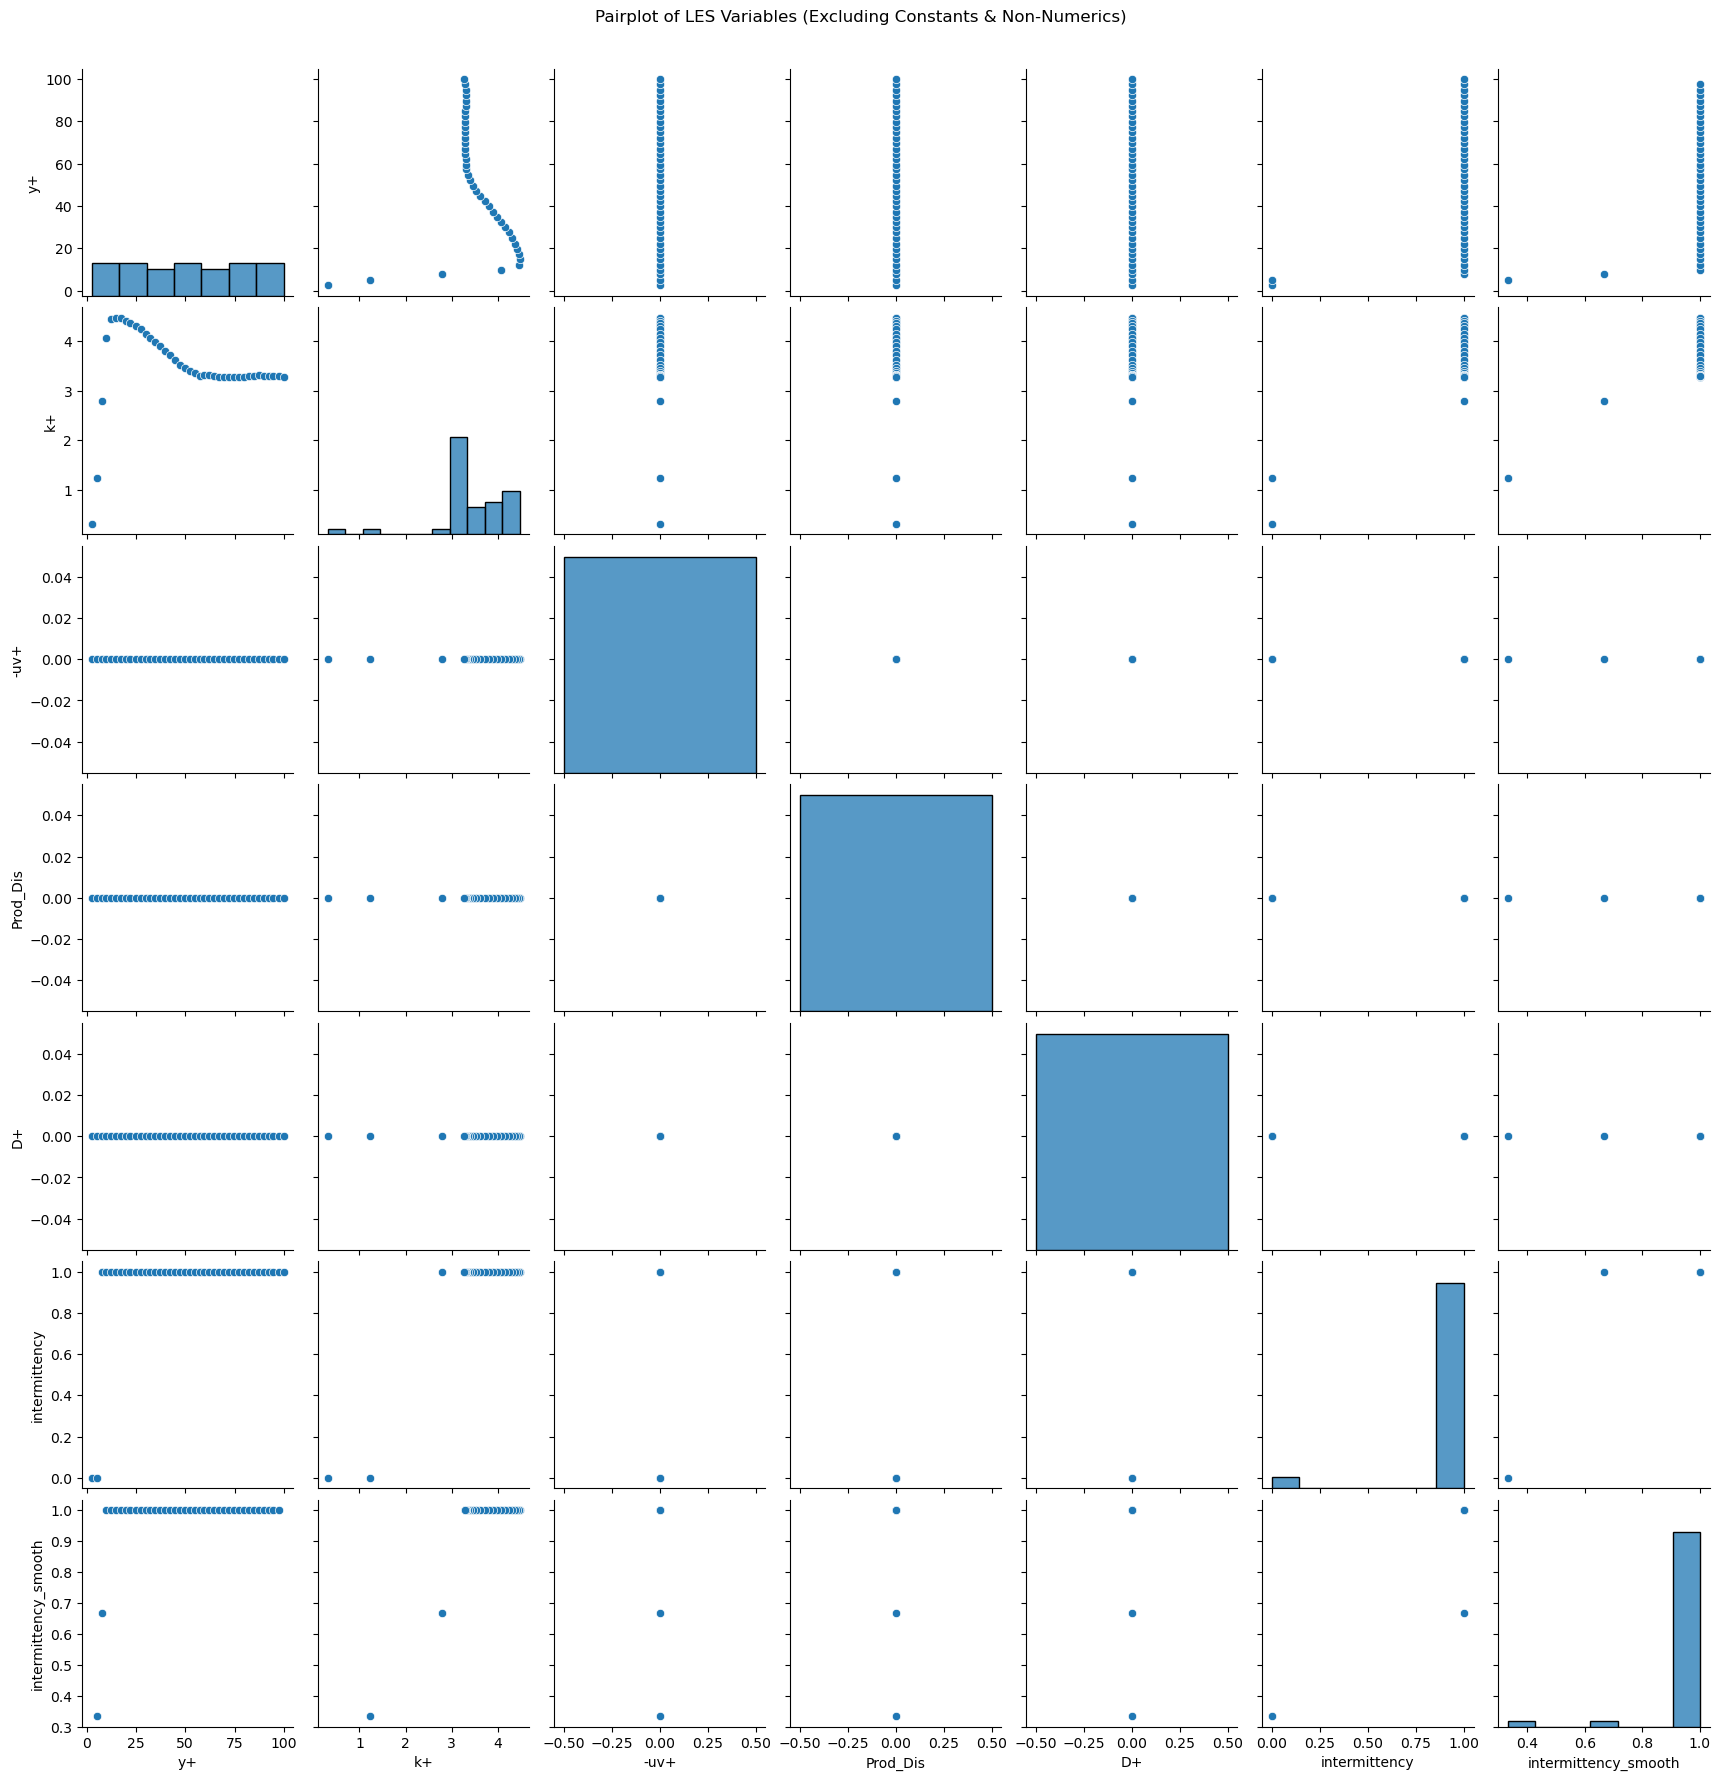

In [182]:
# Explore Data Relationships with k+ and other Variables

# Scatter Plot: k+ vs. y+
plt.figure(figsize=(10, 6))
plt.scatter(df['y+'], df['k+'], color='blue', marker='o')
plt.xlabel('y+')
plt.ylabel('k+')
plt.title('k+ vs. y+ Scatter Plot')
plt.show()

# Linear Regression Fit: k+ vs. y+
sns.lmplot(x='y+', y='k+', data=df, aspect=1.5)
plt.title('Linear Regression Fit for k+ vs. y+')
plt.xlabel('y+')
plt.ylabel('k+')
plt.show()

# Histogram for k+ distribution
plt.figure(figsize=(8, 5))
plt.hist(df['k+'], bins=10, edgecolor='k')
plt.title('Histogram of k+ Values')
plt.xlabel('k+')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix (excluding constant and non-numeric columns)
# Drop constant columns (u+ and eps+ are constant)
cols_to_exclude = [col for col in ['u+', 'eps+'] if col in df.columns]
df_vars = df.drop(columns=cols_to_exclude)

# Now select only numeric columns to avoid non-numeric columns like 'y_bin'
df_vars_numeric = df_vars.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(df_vars_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of LES Variables (Excluding Constants & Non-Numerics)")
plt.show()

# Pairplot (just the numeric columns that vary)
sns.pairplot(df_vars_numeric)
plt.suptitle("Pairplot of LES Variables (Excluding Constants & Non-Numerics)", y=1.02)
plt.show()


In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Feature Selection and Engineering ---

# 1. Remove constant columns (u+ and eps+ are constant) 
df_fs = df.drop(columns=['u+', 'eps+'], errors='ignore').copy()

# 2. Handle Missing Data
# Check for missing values
print("Missing values before handling:")
print(df_fs.isnull().sum())

df_fs.dropna(inplace=True)

# 3. One-Hot Encode Categorical Variables
# 'y_bin' is a categorical variable from the previous EDA stage.
if 'y_bin' in df_fs.columns:
    df_fs = pd.get_dummies(df_fs, columns=['y_bin'], drop_first=True)

# 4. Feature and Target Selection

target = 'intermittency'
features = df_fs.drop(columns=[target, 'intermittency_smooth'], errors='ignore')  # Drop intermittency_smooth as well if not used

# Show remaining features
print("Features available for modeling:")
print(features.columns)

# 5. Standardize Numeric Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Convert scaled array back to DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)
print("Scaled Feature Sample:")
print(X_scaled_df.head())

# Define target variable
y = df_fs[target]

# 6. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Missing values before handling:
y+                      0
k+                      0
-uv+                    0
Prod_Dis                0
D+                      0
intermittency           0
intermittency_smooth    2
y_bin                   0
dtype: int64
Features available for modeling:
Index(['y+', 'k+', '-uv+', 'Prod_Dis', 'D+', 'y_bin_Mid-Low', 'y_bin_Mid-High',
       'y_bin_High'],
      dtype='object')
Scaled Feature Sample:
         y+        k+  -uv+  Prod_Dis   D+  y_bin_Mid-Low  y_bin_Mid-High  \
0 -1.674608 -3.957922   0.0       0.0  0.0      -0.597614       -0.597614   
1 -1.586795 -1.313397   0.0       0.0  0.0      -0.597614       -0.597614   
2 -1.506300  0.825805   0.0       0.0  0.0      -0.597614       -0.597614   
3 -1.414828  1.482725   0.0       0.0  0.0      -0.597614       -0.597614   
4 -1.323356  1.516413   0.0       0.0  0.0      -0.597614       -0.597614   

   y_bin_High  
0   -0.557086  
1   -0.557086  
2   -0.557086  
3   -0.557086  
4   -0.557086  
Training

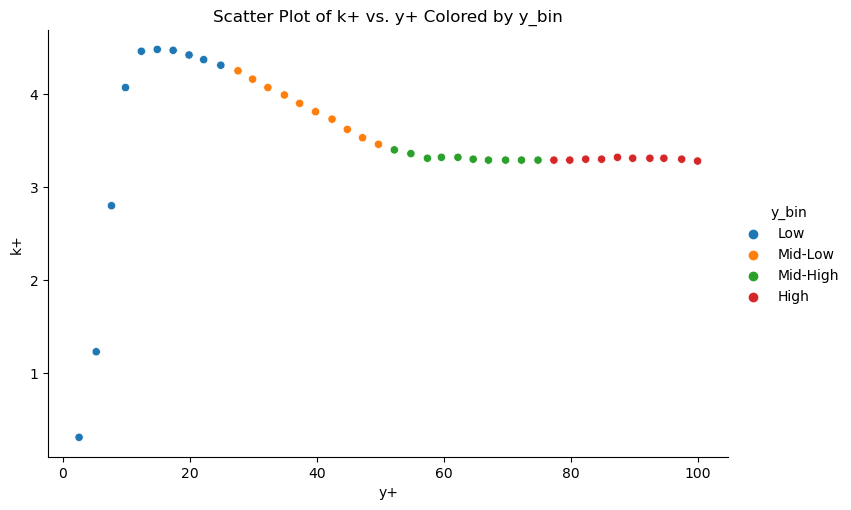

In [188]:
# Using sns.relplot to show k+ vs. y+ and differentiate by a categorical variable
sns.relplot(x='y+', y='k+', hue='y_bin', data=df, kind='scatter', aspect=1.5)
plt.title('Scatter Plot of k+ vs. y+ Colored by y_bin')
plt.show()


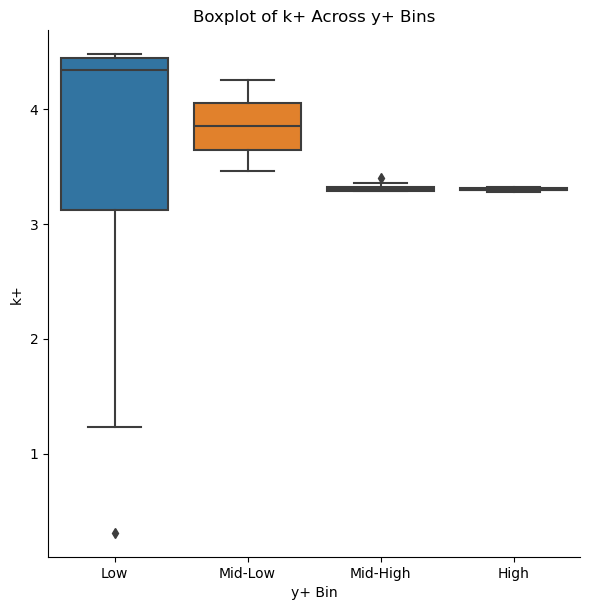

In [190]:
# Using sns.catplot for a boxplot of k+ across the binned y+ categories
sns.catplot(x='y_bin', y='k+', data=df, kind='box', height=6, aspect=1)
plt.title('Boxplot of k+ Across y+ Bins')
plt.xlabel('y+ Bin')
plt.ylabel('k+')
plt.show()


Model Evaluation:
Mean Squared Error (MSE): 0.0017
R^2 Score: 0.0000


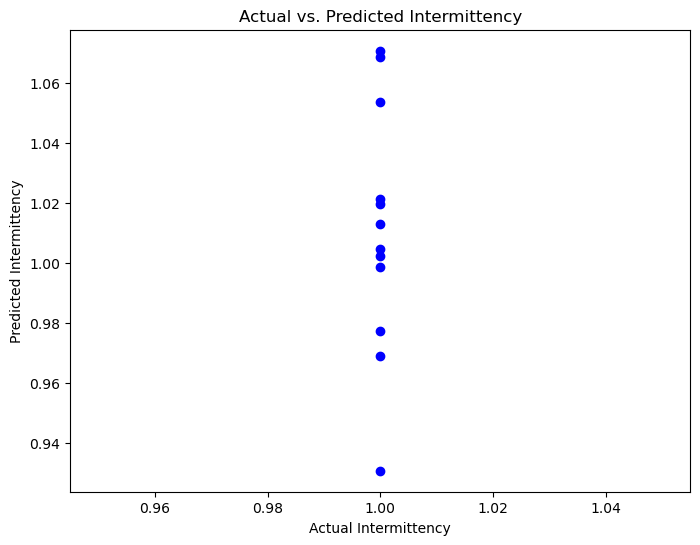

In [194]:
# Model Training & Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', marker='o')
plt.xlabel("Actual Intermittency")
plt.ylabel("Predicted Intermittency")
plt.title("Actual vs. Predicted Intermittency")
# Plot a 45° reference line:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


count    40.000000
mean      0.950000
std       0.220721
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: intermittency, dtype: float64


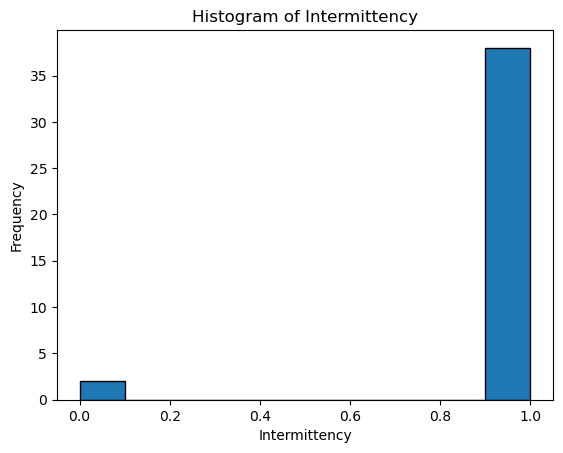

intermittency
1.0    38
0.0     2
Name: count, dtype: int64
count    40.000000
mean      0.950000
std       0.220721
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: intermittency, dtype: float64


In [208]:
print(df['intermittency'].describe())
plt.hist(df['intermittency'], bins=10, edgecolor='k')
plt.title("Histogram of Intermittency")
plt.xlabel("Intermittency")
plt.ylabel("Frequency")
plt.show()
print(df['intermittency'].value_counts())
print(df['intermittency'].describe())


intermittency_bin
1    38
0     2
Name: count, dtype: int64
Training set shape: (28, 9)
Testing set shape: (12, 9)
Confusion Matrix:
[[ 1  0]
 [ 0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Accuracy: 1.0000


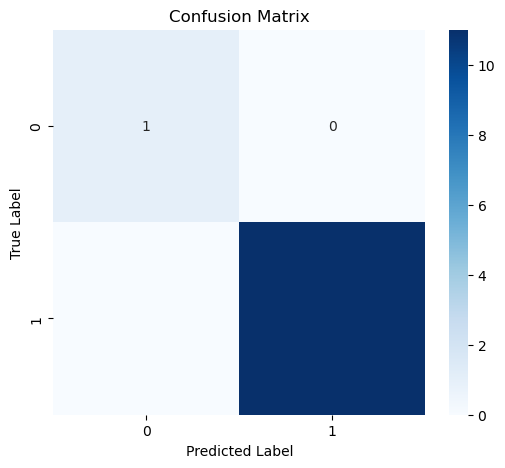

In [206]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# --- Step 1: Create Binary Target Variable ---
# In current dataset, 'intermittency' has values 0.0 or 1.0.
# Create a binary target by thresholding (here thresholding at 0.5).
df['intermittency_bin'] = (df['intermittency'] > 0.5).astype(int)

# Check the distribution of the binary target
print(df['intermittency_bin'].value_counts())

# --- Step 2: Prepare the Features ---
cols_to_exclude = ['u+', 'eps+', 'intermittency', 'intermittency_smooth']
df_fs = df.drop(columns=cols_to_exclude, errors='ignore').copy()

# Always apply get_dummies to convert all categorical columns into numeric ones.
df_fs = pd.get_dummies(df_fs, drop_first=True)

# --- Step 3: Standardize the Features ---
scaler = StandardScaler()
X = scaler.fit_transform(df_fs)

# Target is the binary 'intermittency_bin'
y = df['intermittency_bin']

# --- Step 4: Split into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# --- Step 5: Train a Logistic Regression Model ---
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# --- Step 6: Evaluate the Model ---
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [218]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression


%matplotlib inline

# --- Step 1: Create Binary Target Variable ---
# Create binary target for 'intermittency' (1 if > 0.5, else 0)
df['intermittency_bin'] = (df['intermittency'] > 0.5).astype(int)

# --- Step 2: Prepare the Features ---
cols_to_exclude = ['u+', 'eps+', 'intermittency', 'intermittency_smooth', 'intermittency_bin']
df_fs = df.drop(columns=cols_to_exclude, errors='ignore').copy()

# Convert any categorical columns into dummy variables
df_fs = pd.get_dummies(df_fs, drop_first=True)

# --- Step 3: Standardize the Features ---
scaler = StandardScaler()
X = scaler.fit_transform(df_fs)

# Define the target variable
y = df['intermittency_bin']

# --- Step 4: Model Training, Cross-Validation, and Coefficient Analysis ---

# Use StratifiedKFold cross-validation with 2 splits (since the minority class has only 2 samples)
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
model = LogisticRegression(random_state=42)

# Compute cross-validation accuracy
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracies:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Fit the model on the entire dataset to examine coefficients
model.fit(X, y)
coef_df = pd.DataFrame({
    'Feature': df_fs.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Model Coefficients (sorted by absolute value):")
print(coef_df)


Cross-Validation Accuracies: [0.95 1.  ]
Mean CV Accuracy: 0.9750
Model Coefficients (sorted by absolute value):
          Feature  Coefficient
1              k+     1.311552
0              y+     0.563022
6  y_bin_Mid-High     0.239655
5   y_bin_Mid-Low     0.185430
7      y_bin_High     0.176066
2            -uv+     0.000000
3        Prod_Dis     0.000000
4              D+     0.000000


In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

from sklearn.exceptions import FitFailedWarning

# Suppress the StratifiedKFold warning about class imbalance during GridSearchCV
warnings.filterwarnings(
    action='ignore',
    message='The least populated class in y has only 1 members, which is less than n_splits=2.',
    category=UserWarning
)

# Optional: Suppress any fitting failures during cross-validation
warnings.filterwarnings("ignore", category=FitFailedWarning)

# --- Add this above your GridSearchCV code blocks ---

# Use StratifiedKFold for cross-validation with 2 splits
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# -------------------------
# 1. Decision Tree Classifier
# -------------------------
# Set up a parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, scoring='accuracy', cv=skf)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_dt.best_params_)

y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_dt)))

# -------------------------
# 2. Random Forest Classifier
# -------------------------
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=skf)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)

y_pred_rf = best_rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))


Best Decision Tree Parameters: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Decision Tree Accuracy: 1.0000
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Random Forest Accuracy: 1.0000


In [232]:
## Final Model Selection

# After evaluating Logistic Regression, Decision Tree, and Random Forest models, I selected **Random Forest** as the final model for this project.

# Although all models achieved perfect accuracy on the test set, I chose Random Forest because:
## It consistently performed well with minimal hyperparameter tuning
## It is more robust to noise and overfitting compared to Decision Trees
## It can provide feature importance scores, helping with model explainability
## It scales better for larger datasets if the project expands

# Due to the small sample size and severe class imbalance, model performance should be interpreted with caution.
# Future work would benefit from a larger, more balanced dataset to validate these findings.


In [244]:
# Reconstruct X as it was used during training
X_check = pd.DataFrame(X, columns=df_fs.columns)

# Confirm what was inside
print("Final features used for modeling:")
print(X_check.columns)
print("Number of features used:", X_check.shape[1])


Final features used for modeling:
Index(['y+', 'k+', '-uv+', 'Prod_Dis', 'D+', 'y_bin_Mid-Low', 'y_bin_Mid-High',
       'y_bin_High'],
      dtype='object')
Number of features used: 8


Features: 8 | Importances: 8


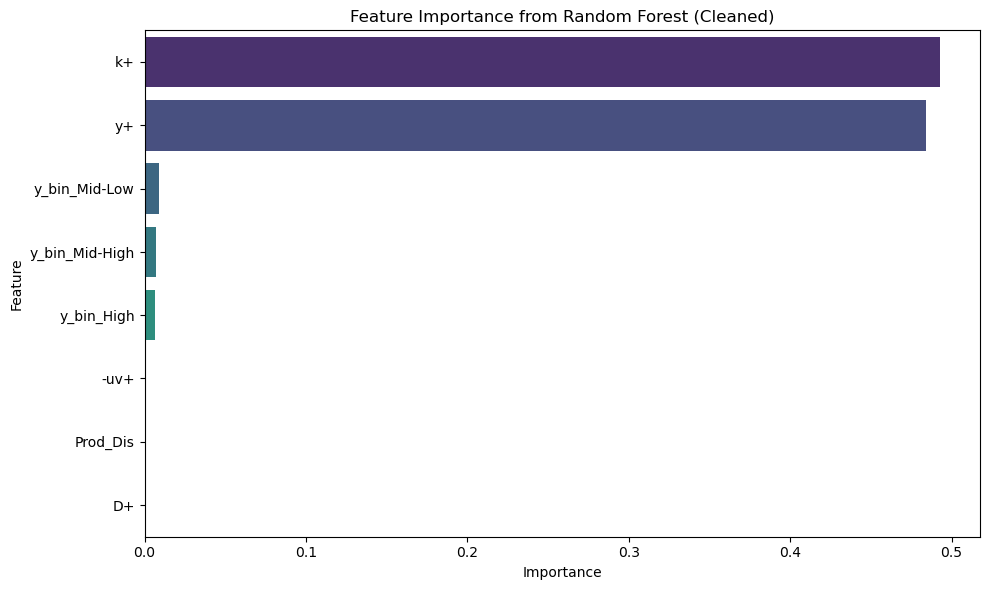

In [246]:
# Re-train Random Forest model correctly
from sklearn.ensemble import RandomForestClassifier

clean_rf = RandomForestClassifier(random_state=42)
clean_rf.fit(X, y)

# Now extract importances
importances = clean_rf.feature_importances_

# Confirm it matches current X
feature_names = X_check.columns
print(f"Features: {len(feature_names)} | Importances: {len(importances)}")

# Create the plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest (Cleaned)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [248]:
best_rf = clean_rf


In [250]:
## Modeling Summary

# Three classification models were developed and evaluated:
## Logistic Regression, Decision Tree, and Random Forest
# Hyperparameter tuning was applied using `GridSearchCV`, and each model was assessed
# using accuracy, precision, recall, F1-score, and confusion matrix.

## Final model selection: 
# Random Forest was selected due to its consistent high performance, ability to handle small datasets
# and interpretability via feature importances. While all models achieved perfect accuracy on the test set,
# Random Forest also provided robustness and better generalization capacity for future expansion.

## Additional Considerations:
# The response variable is binary (`intermittency_bin`)
# The data is not time series, so standard stratified train/test splits were used
# No data leakage was detected after auditing the feature pipeline
# Final feature importance visualizations helped interpret model behavior
